# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [6]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)

import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

##Import Dataset

In [7]:
# load the data
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded["INNHotelsGroup.csv"]))


Saving INNHotelsGroup.csv to INNHotelsGroup.csv


## Data Overview

- Observations
- Sanity checks

In [8]:
# return the first five rows
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [9]:
# return the last five rows
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [10]:
# return the number of rows by the number of columns
df.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns of data

In [11]:
# print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#Observations:


* booking_status is the dependent variable- type object.
* Independent variables are in both type of the data, integer (14) and object (4).

In [12]:
# check missing values across each columns
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There is no missing value in the data set.

In [13]:
# check for duplicates
duplicates = df.duplicated()
# print the duplicated rows
print(df[duplicates])

Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []


* There is no dublicates.

In [14]:
# checking for unique values in ID column
df["Booking_ID"].nunique()

36275

* Since all the values in **Booking_ID** column are unique we can drop it

In [15]:
# drop "Booking_ID" column
columns_to_drop = ["Booking_ID"]
df = df.drop(columns_to_drop, axis=1)

In [16]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [17]:
# check statistical summary of the all data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,NaN,NaN,NaN,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000


## Observations:
* The favorite type of meal plan is **Meal Plan 1**
* The favorite room type reserved is **Room type 1**
* The favorite marketing type is **online**
* Number of bookings canceled is less than number of bookings not canceled.

In [18]:
# check statistical summary of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


* the lead time ranging from 0 to 443 days while the average lead time is 85.
* There is only one repeating guest and this guest canceled 13 bookings while not canceled 58 other bookings before.
* Room prices range from 0 to 540 while the average is 103.4 euro.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Univariate Analysis

In [19]:
# Lets write function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [20]:
# Lets write a function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Lets check the distribution for columns that has numerical data!

### Observations on 'lead_time'

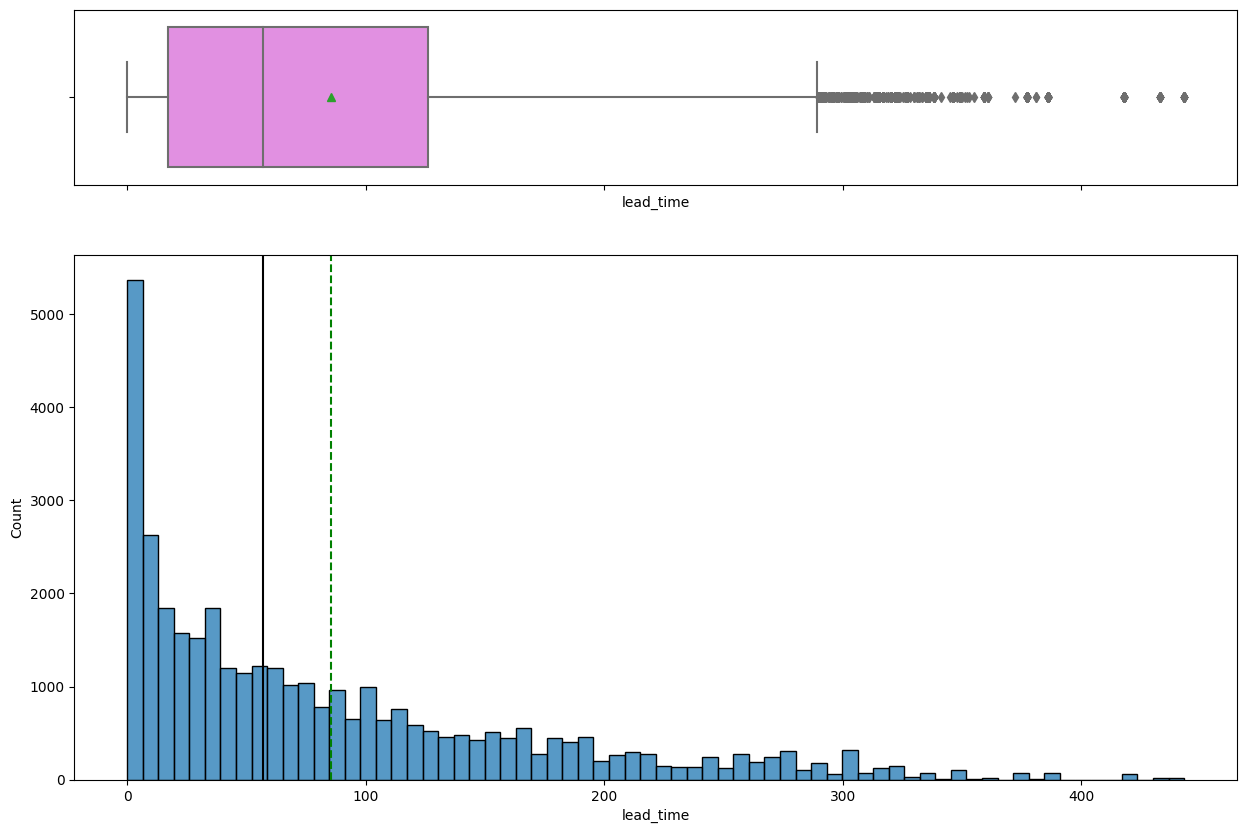

In [21]:
histogram_boxplot(df, 'lead_time', figsize=(15, 10), kde=False, bins=None)

* The distribution is right skewed. That means majority of the guests book less than 100 days. Mean=85, Median=57
* There are outliers.

### Observations on average price per room

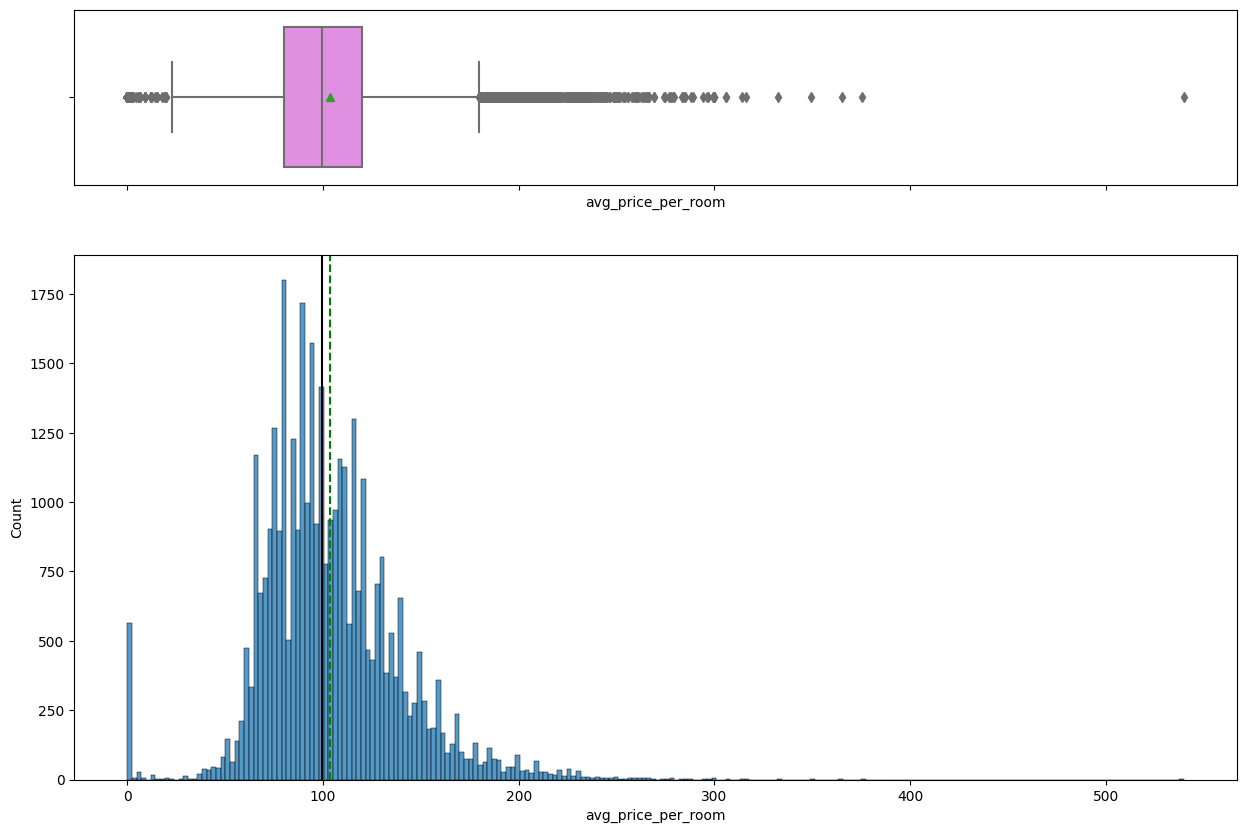

In [22]:
histogram_boxplot(df, 'avg_price_per_room', figsize=(15, 10), kde=False, bins=None)

* The distribution is slightly right skewed but we can accept it as normal. Mean is closer to median and around 100 euro.
* There are outliers.
* There are guests over 500 paid zero euro to stay.

In [23]:
# Lets see characteristics of guests who stayed without paying.
df[df["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


In [24]:
# Lets find number of guests who stayed without paying.
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()


Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [25]:
# Calculate 25th quantile for average price per room
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculate the 75th quantile
Q3 = df['avg_price_per_room'].quantile(.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [26]:
# assign the outliers the value of upper whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

### Observations on number of previous booking cancellations

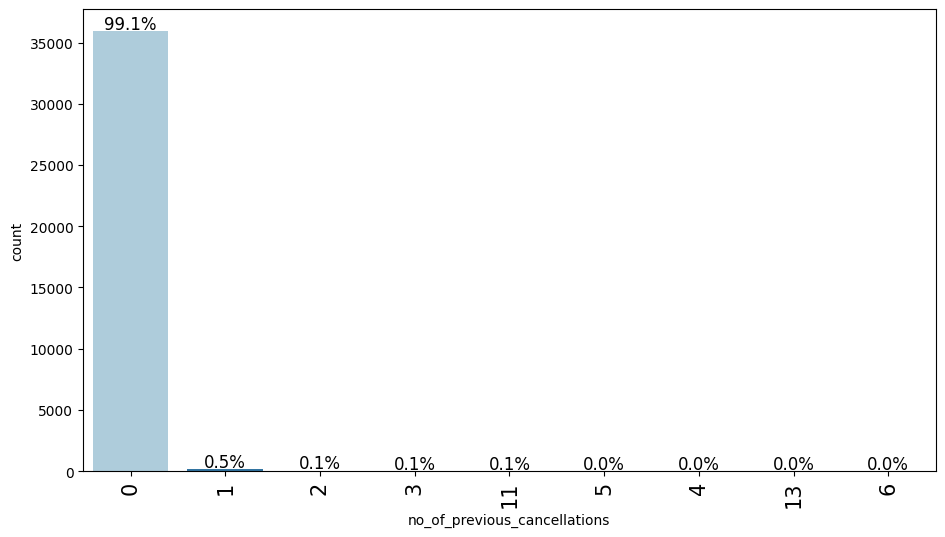

In [27]:
labeled_barplot(df, "no_of_previous_cancellations", perc=True)

* 99% of the quests have not canceled their booking before.

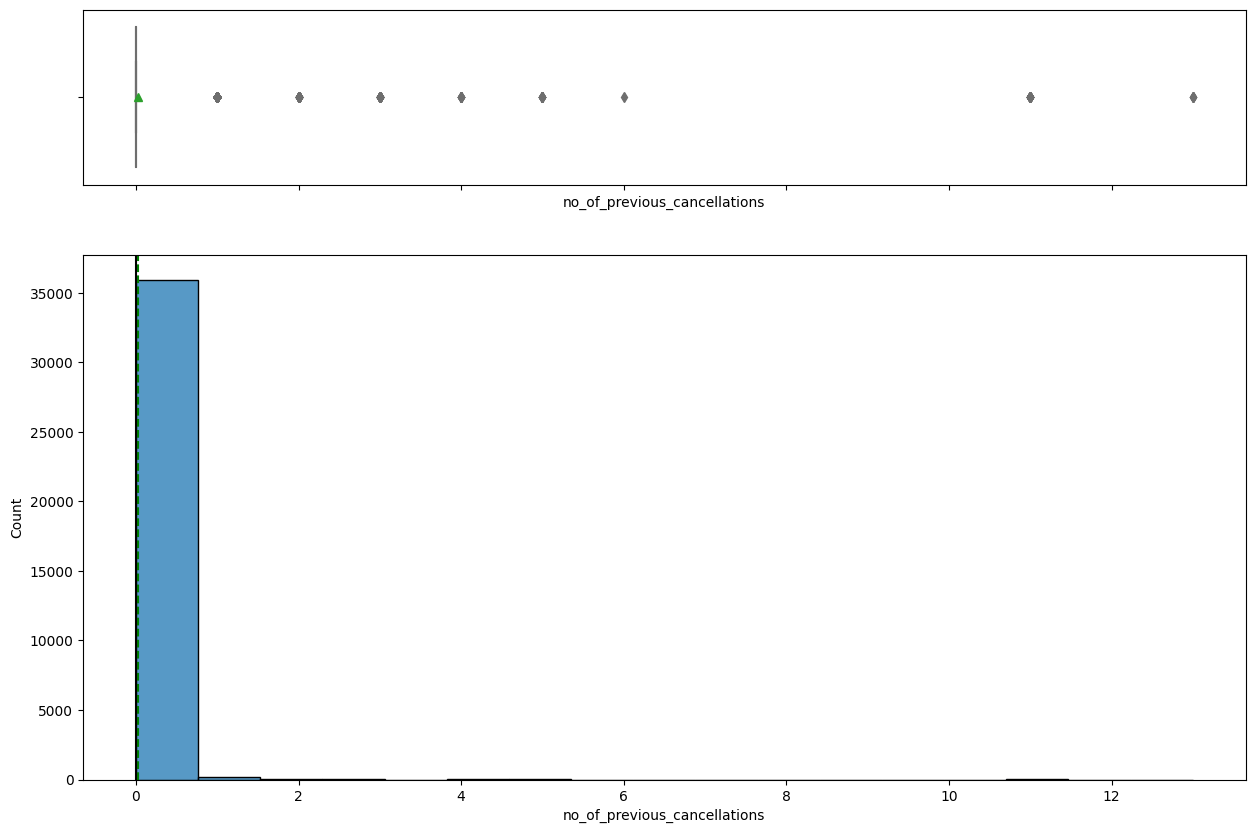

In [28]:
histogram_boxplot(df, 'no_of_previous_cancellations', figsize=(15, 10), kde=False, bins=None)

* The distribution is right skewed.
* Although there are outliers, number of previous booking cancellations are very low.

### Observations on number of previous booking not canceled

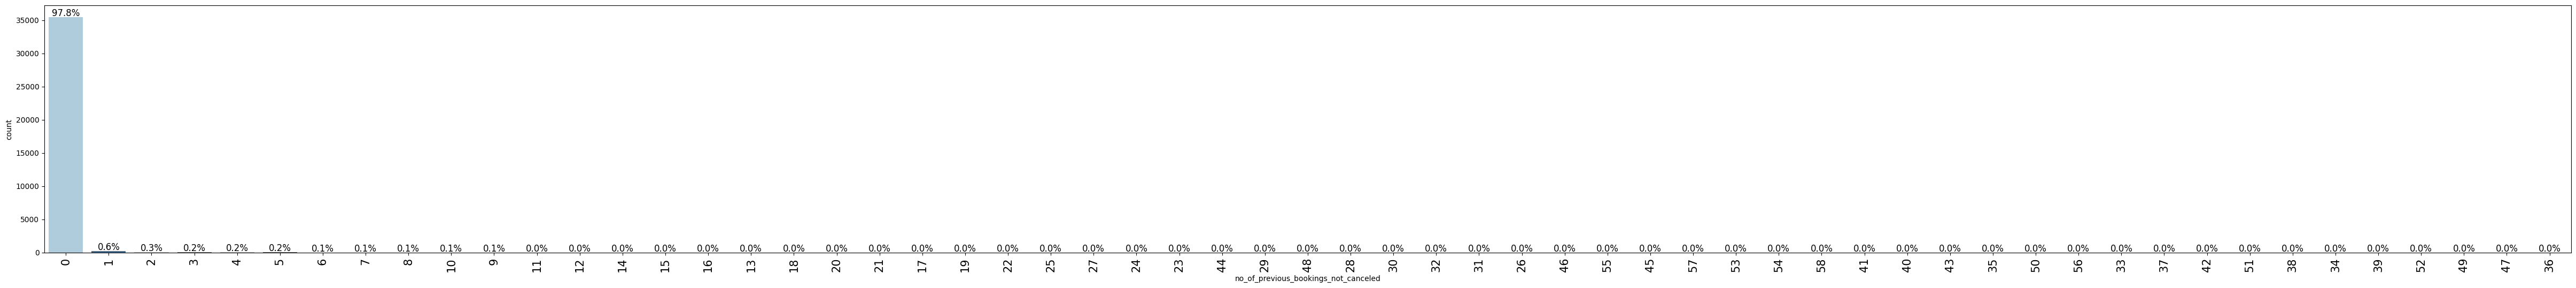

In [29]:
labeled_barplot(df, "no_of_previous_bookings_not_canceled", perc=True)

* About 98% of the guests have not canceled their booking before.

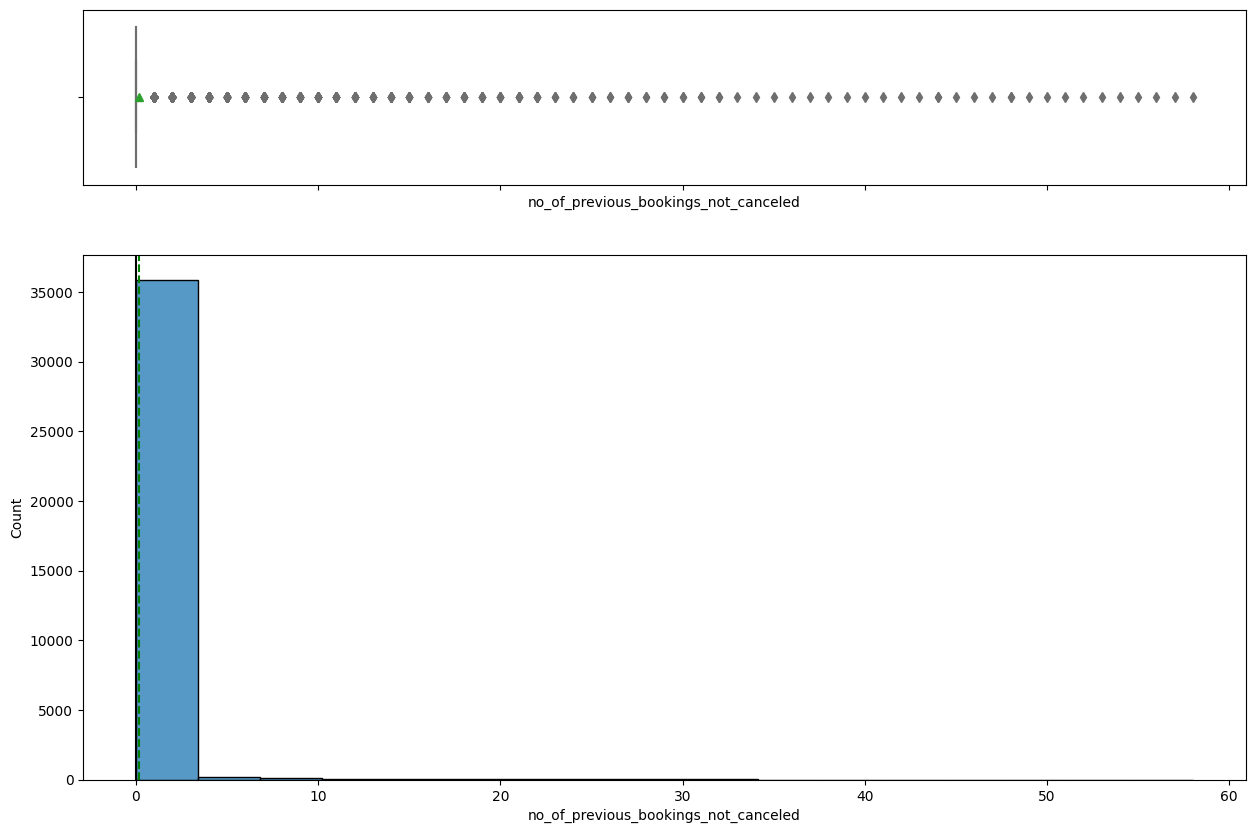

In [30]:
histogram_boxplot(df, 'no_of_previous_bookings_not_canceled', figsize=(15, 10), kde=False, bins=None)

### Observations on number of adults

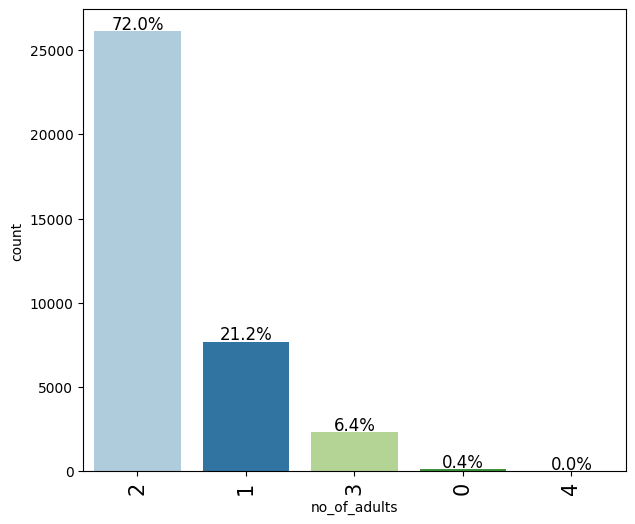

In [31]:
labeled_barplot(df, "no_of_adults", perc=True)

* 72% of bookings had two adults in reservation.

### Observations on number of children

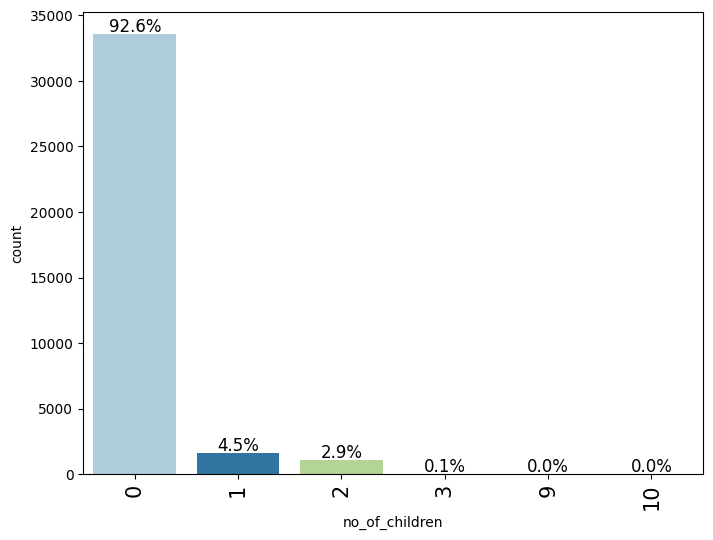

In [32]:
labeled_barplot(df, "no_of_children", perc=True)

* 92% of bookings didnt have any child in reservation.

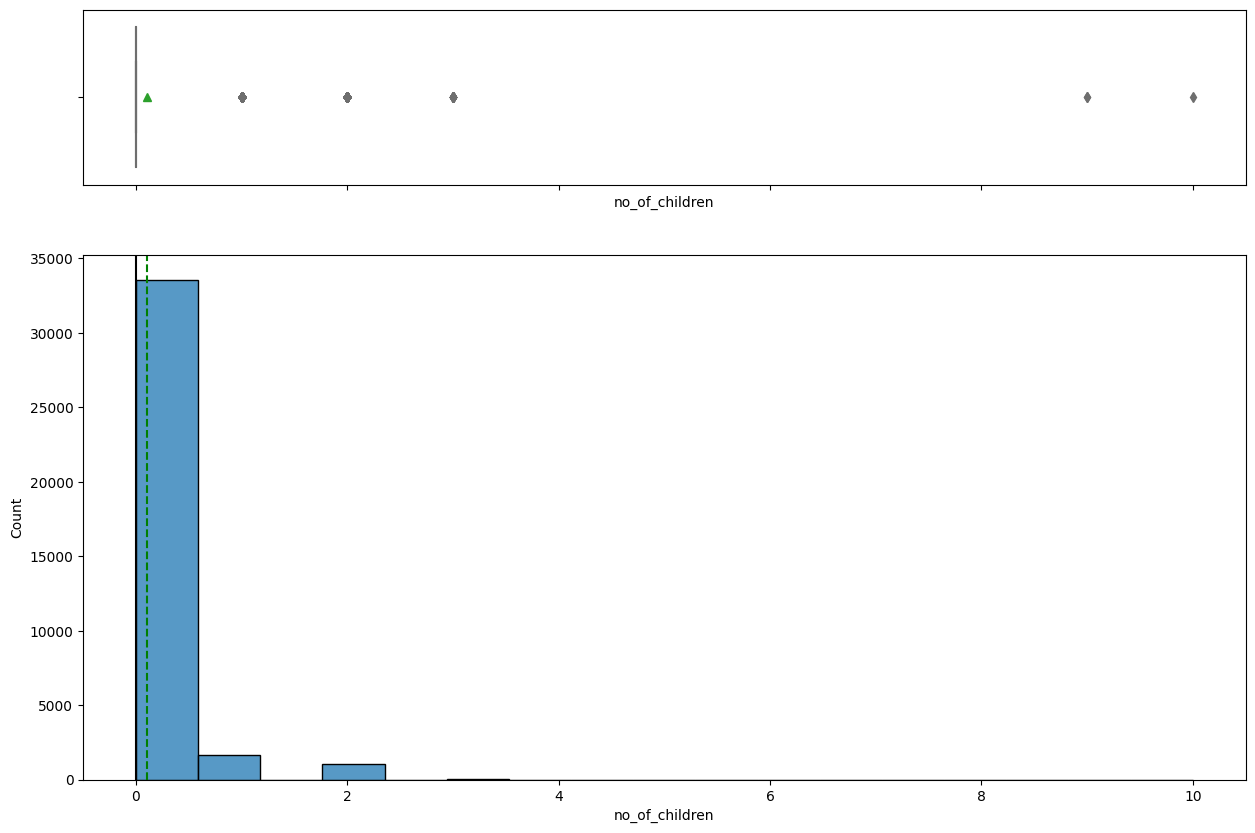

In [33]:
histogram_boxplot(df, 'no_of_children', figsize=(15, 10), kde=False, bins=None)

* There are outliers such as childen 9 and 10.
Lets replace these values with 3.

In [34]:
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

### Observations on number of weekend nights


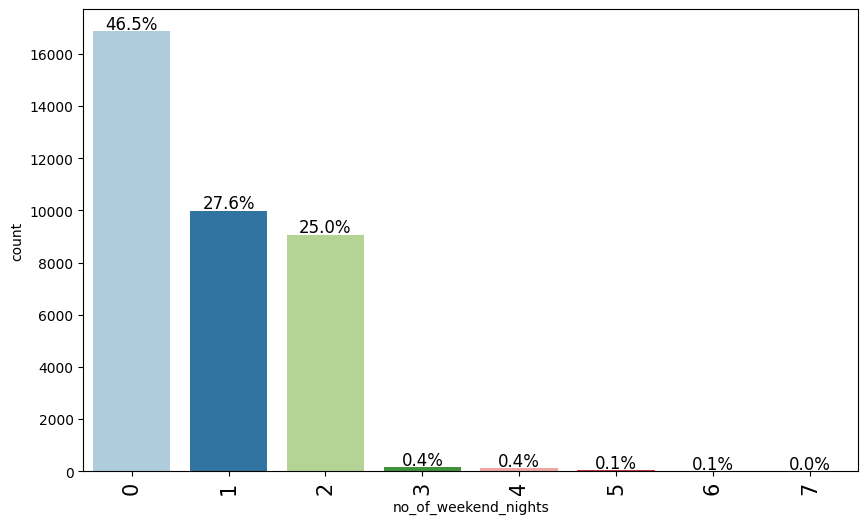

In [35]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)

* More than halft of the guests stayed on weekend days.
* Mostly one or two days.

### Observations on number of week nights

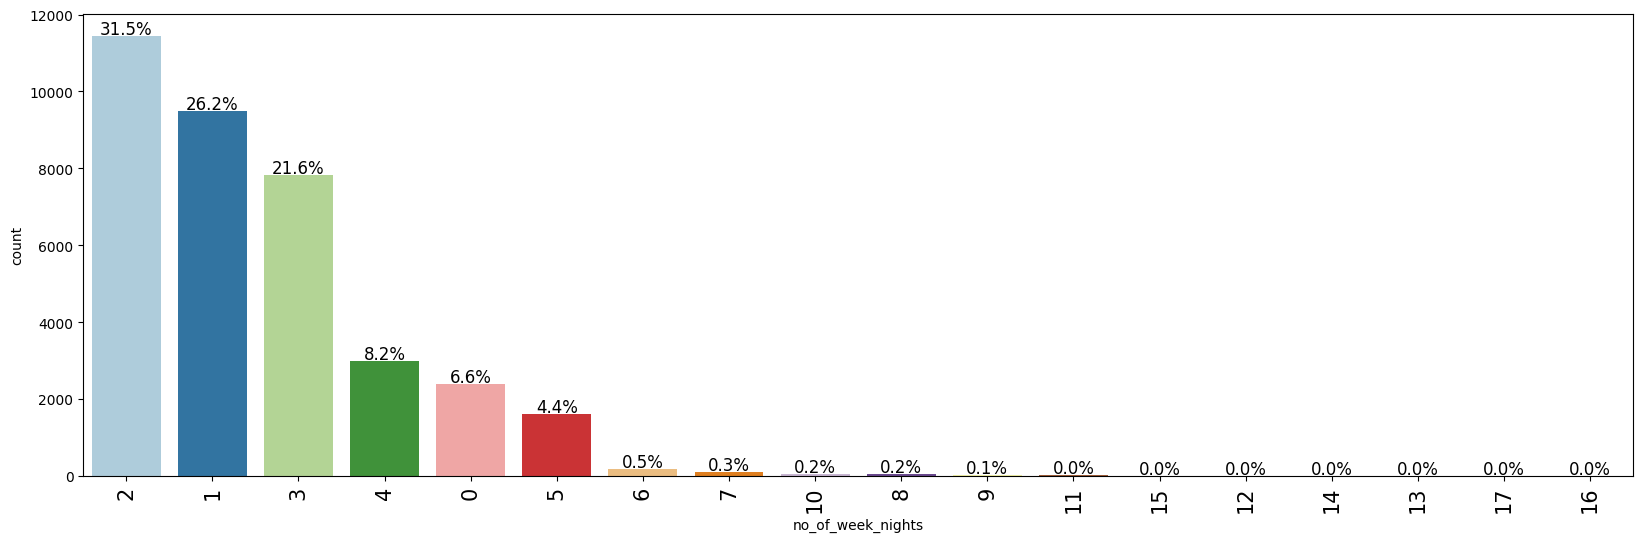

In [36]:
labeled_barplot(df, "no_of_week_nights", perc=True)

* 1/3 of the guests stayed 2 week days.

### Observations on required car parking space


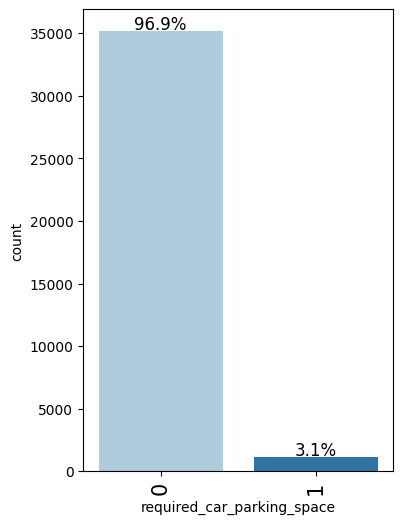

In [37]:
labeled_barplot(df, "required_car_parking_space", perc=True)

* 97% of the guests did not require car parking space.

### Observations on type of meal plan


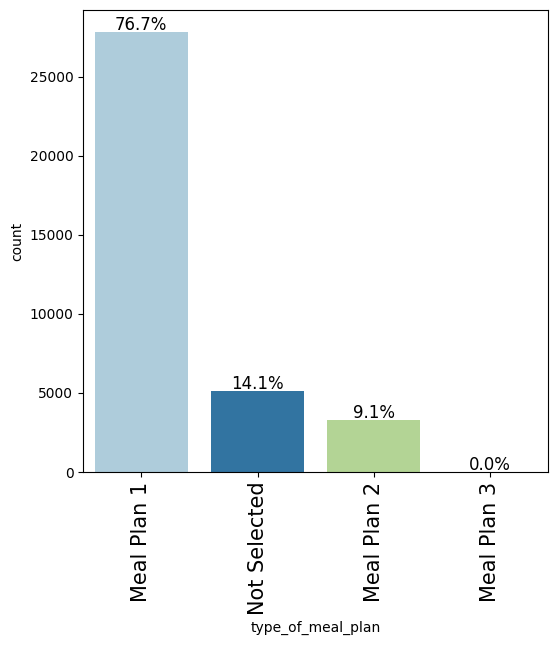

In [38]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

* 76.7 % of the guests prefered Meal Plan 1


### Observations on room type reserved



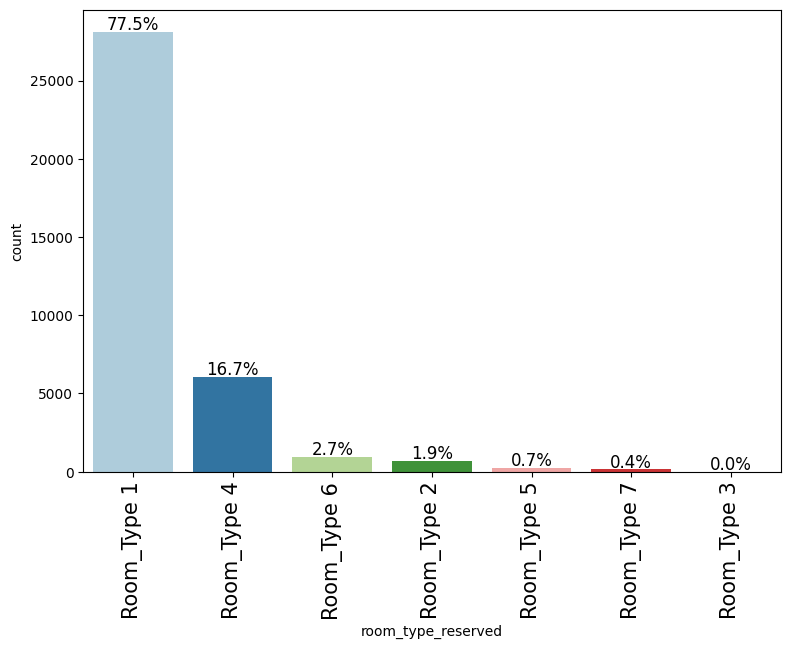

In [39]:
labeled_barplot(df, "room_type_reserved", perc=True)

* 77.5 % of the quests prefered Type 1 rooms.


### Observations on arrival month


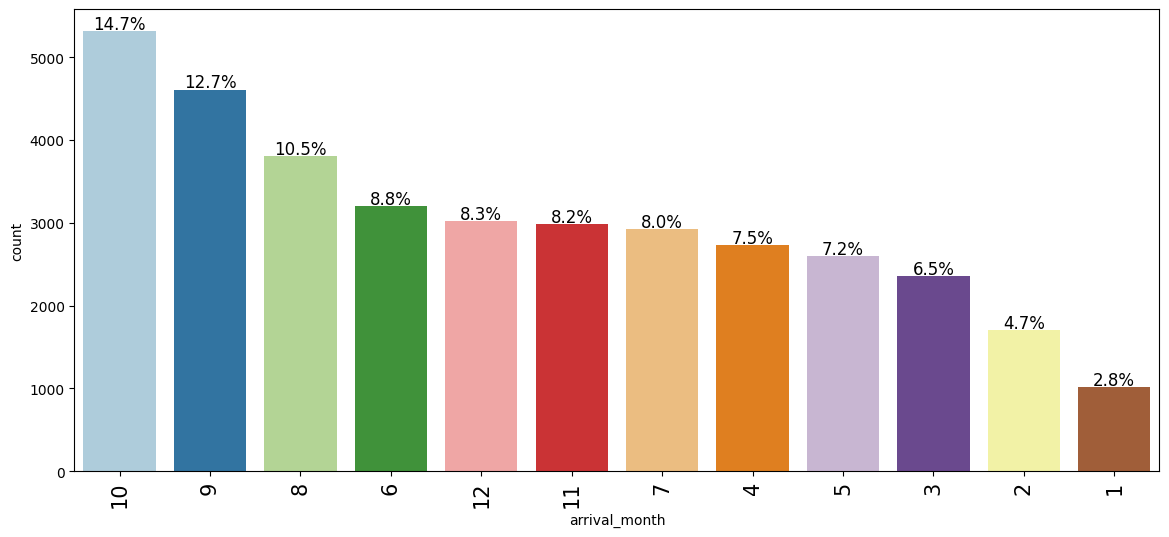

In [40]:
labeled_barplot(df, "arrival_month", perc=True)

* Highest number of guests in October by 14.7%.
* September and August follow October in order by 12.7% and 10.5%.

### Observations on market segment type



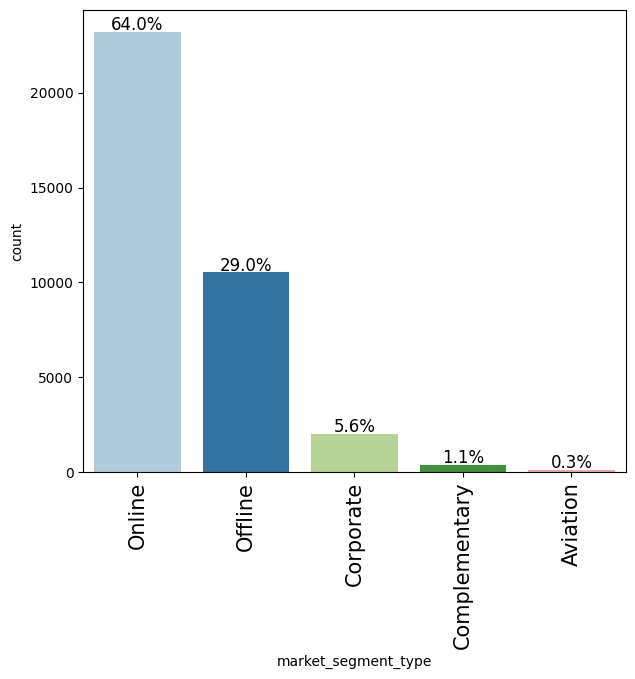

In [41]:
labeled_barplot(df, "market_segment_type", perc=True)

* 64% of the guests book online.


### Observations on number of special requests



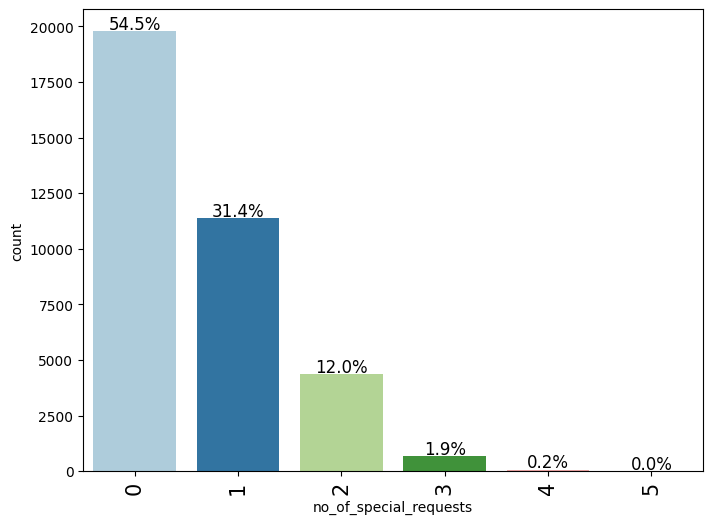

In [42]:
labeled_barplot(df, "no_of_special_requests", perc=True)

* 54% of the guests didnt have any special requests.
* Almost 1/3 of the guests had one request


### Observations on booking status


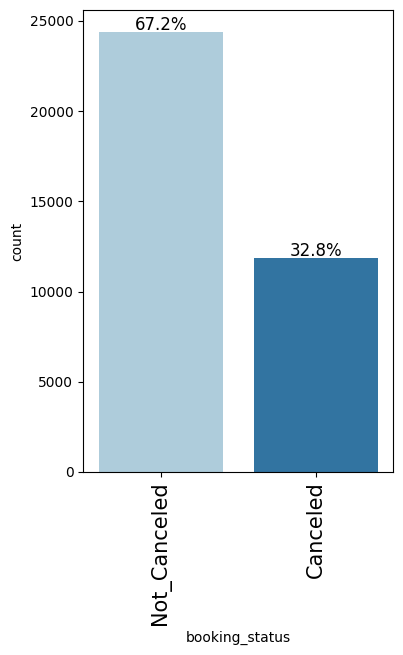

In [43]:
labeled_barplot(df, "booking_status", perc=True)

* Almost 1/3 of the bookings canceled.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [44]:
df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

## Bivariate Anaysis

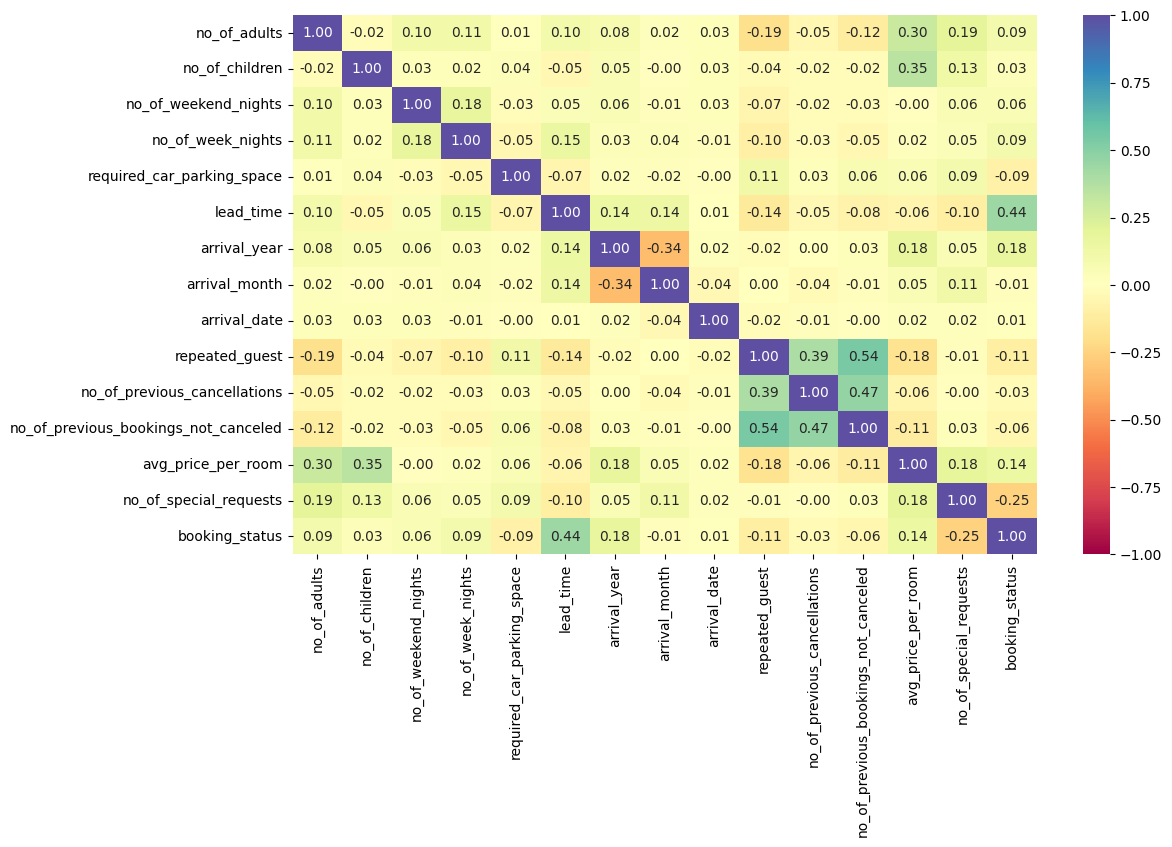

In [45]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There is a positive moderate correlation between repeated guest and number of previous cancellations and not cancelletaions.
* There is another positive correlation between lead time and booking status.

**Lets create functions that will help us with further analysis.**

In [47]:
 ### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [49]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

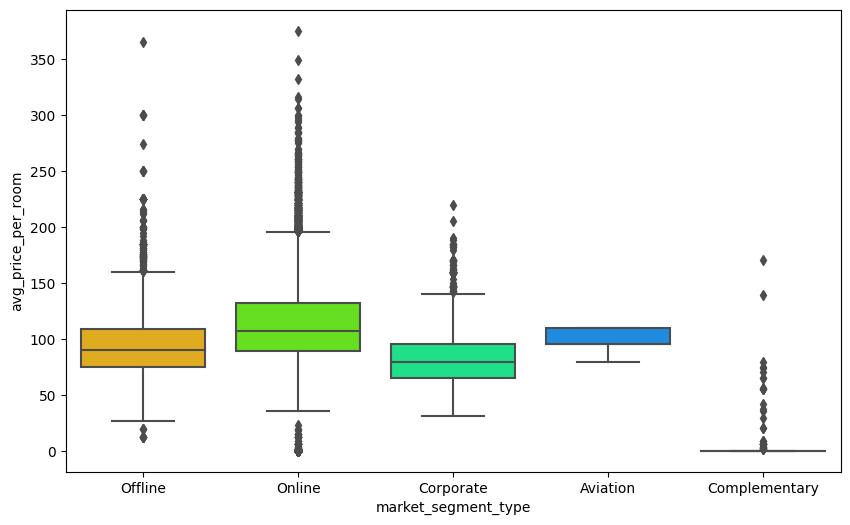

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


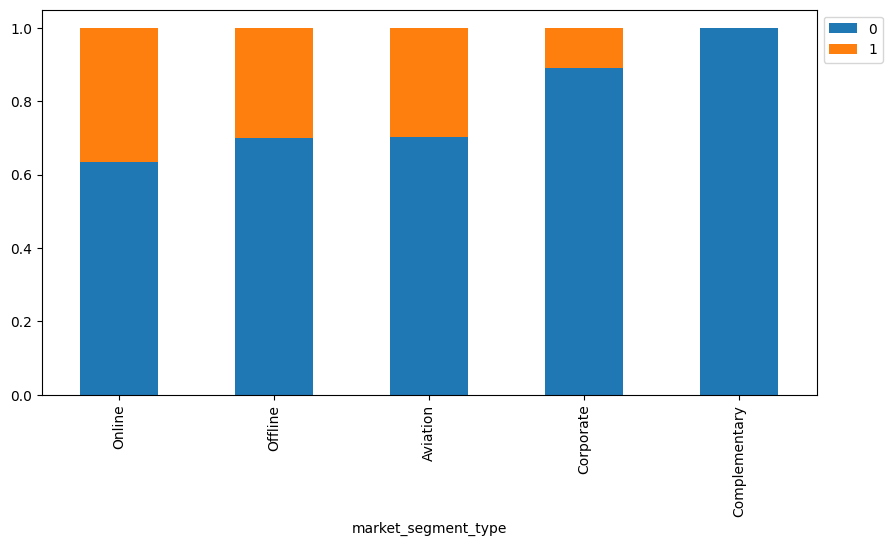

In [51]:
stacked_barplot(df, "market_segment_type", "booking_status")

* Guests who booked online has more cancelations amount comparing to other market segment types
* Complementary bookings do not have any cancellation.

**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


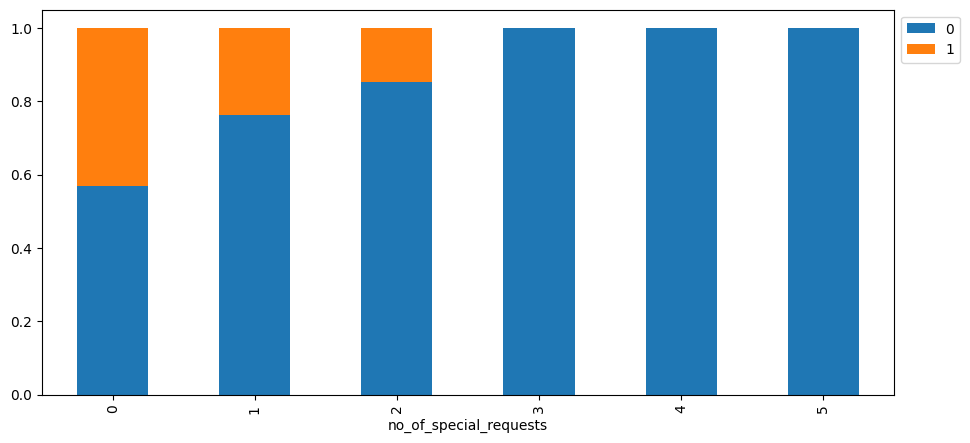

In [52]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

* Guests who had more than 3 special requests didnt have any booking cancellation.
* Guests who had no special request had highest number of cancellation number.

**Let's see if the special requests made by the customers impacts the prices of a room**

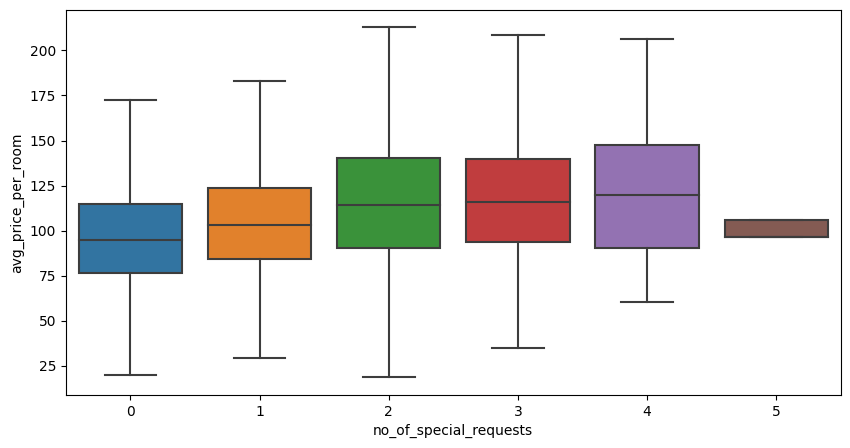

In [53]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="no_of_special_requests", y="avg_price_per_room", showfliers=False)
plt.show()


* As number of requests increase, range of the price of the rooms meet these needs decrease.

**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it**

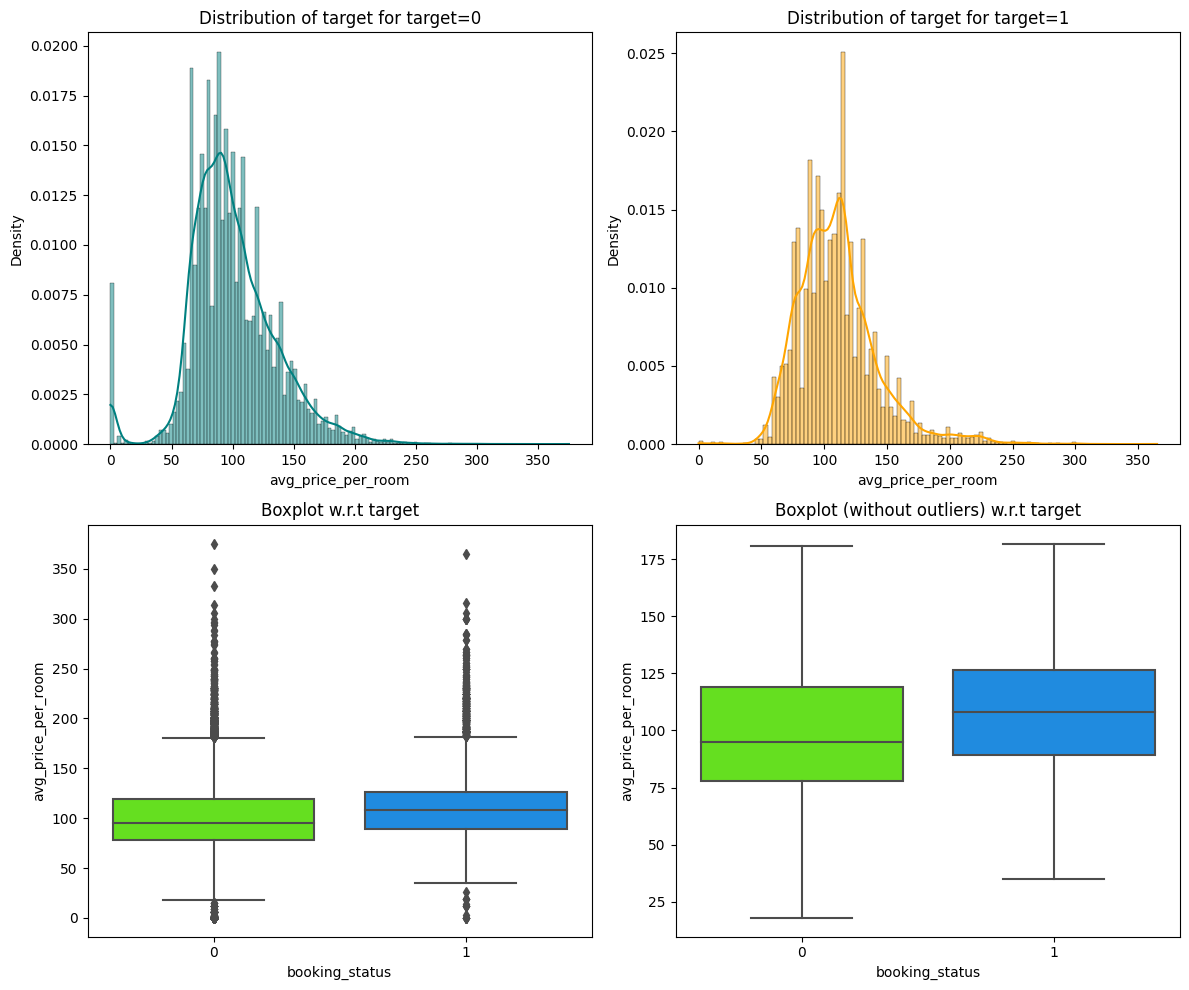

In [54]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

* Median value of price of the rooms for cancelled bookings is higher


**There is a positive correlation between booking status and lead time also. Let's analyze it further**

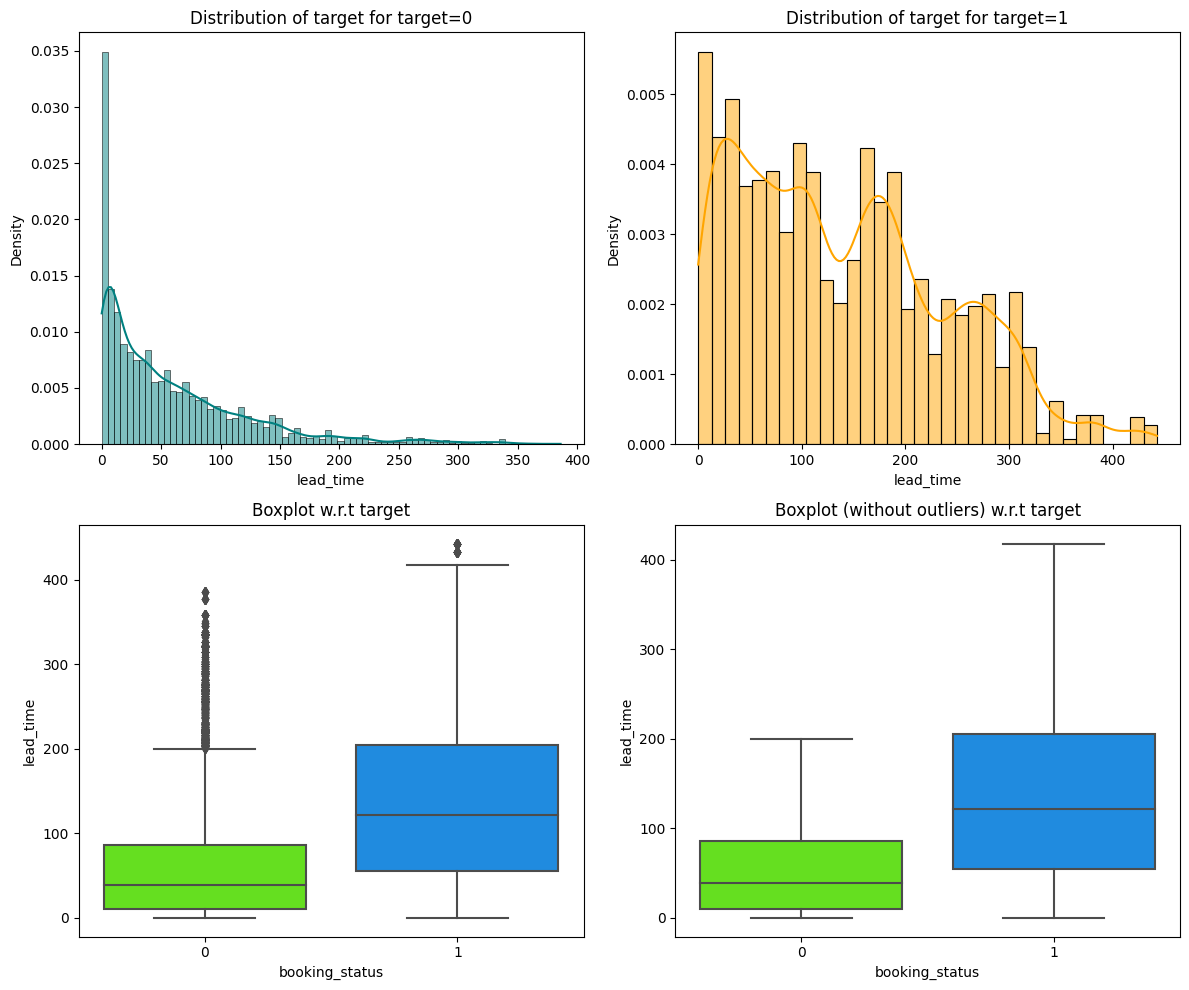

In [55]:
distribution_plot_wrt_target(df,"lead_time","booking_status")

* Bookings that cancelled had higher lead time.

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [56]:
family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

* 28441 bookings are made by a family (spouse and children).

In [57]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


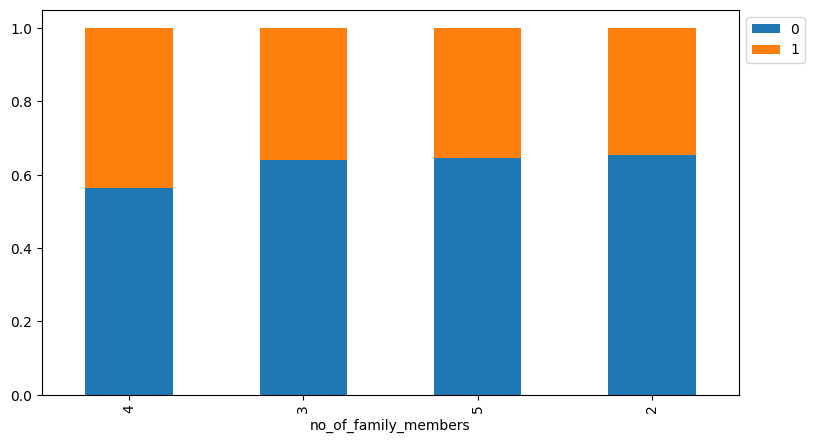

In [58]:
stacked_barplot(family_data, "no_of_family_members", "booking_status")

* There is no clear relation seen between number of family members and booking status.

**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [59]:
stay_data = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

* 17094 customers stayed at least one day at the hotel.

In [60]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

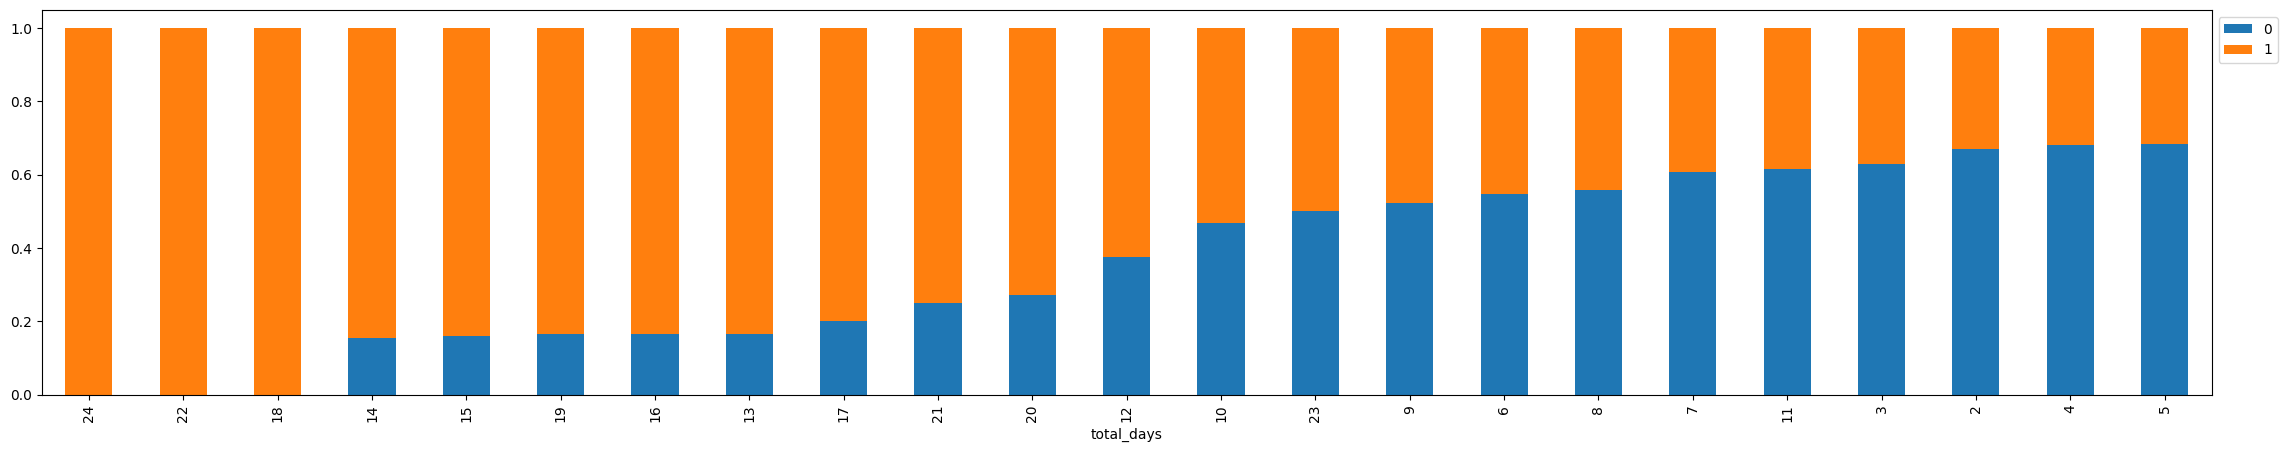

In [61]:
stacked_barplot(stay_data, "total_days", "booking_status")

* As number of days booked increase, chance of booking being cancelled increase.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


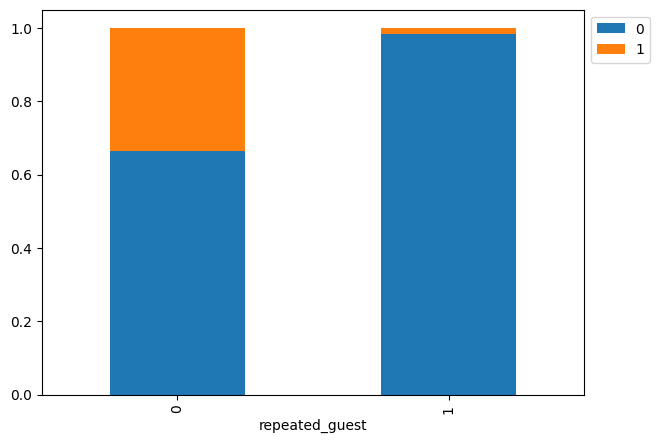

In [62]:
stacked_barplot(df, "repeated_guest", "booking_status")

* Repeated guests are not tend to cancel booking. Only 16 out of 930 of them cancelled their booking.
* Chance of booking being cancelled is very low for repeated guests.

**Let's find out what are the busiest months in the hotel.**

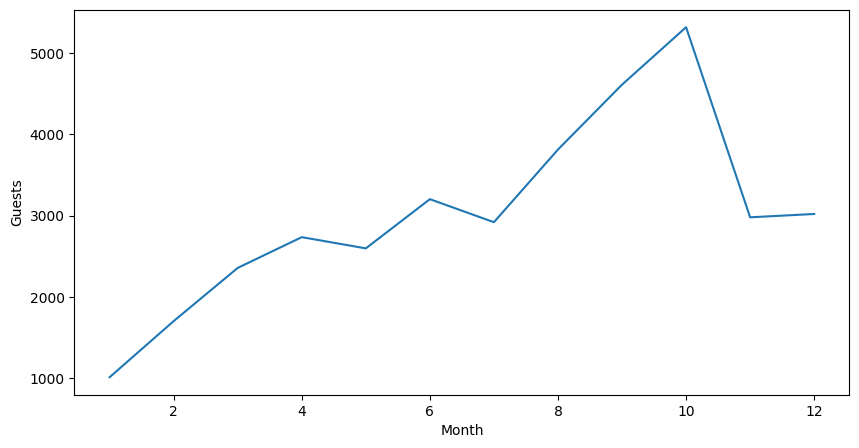

In [63]:
# group the data on arrival months and extracting the count of bookings
monthly_data = df.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

* The busiest month is October.

**Let's check the percentage of bookings canceled in each month.**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


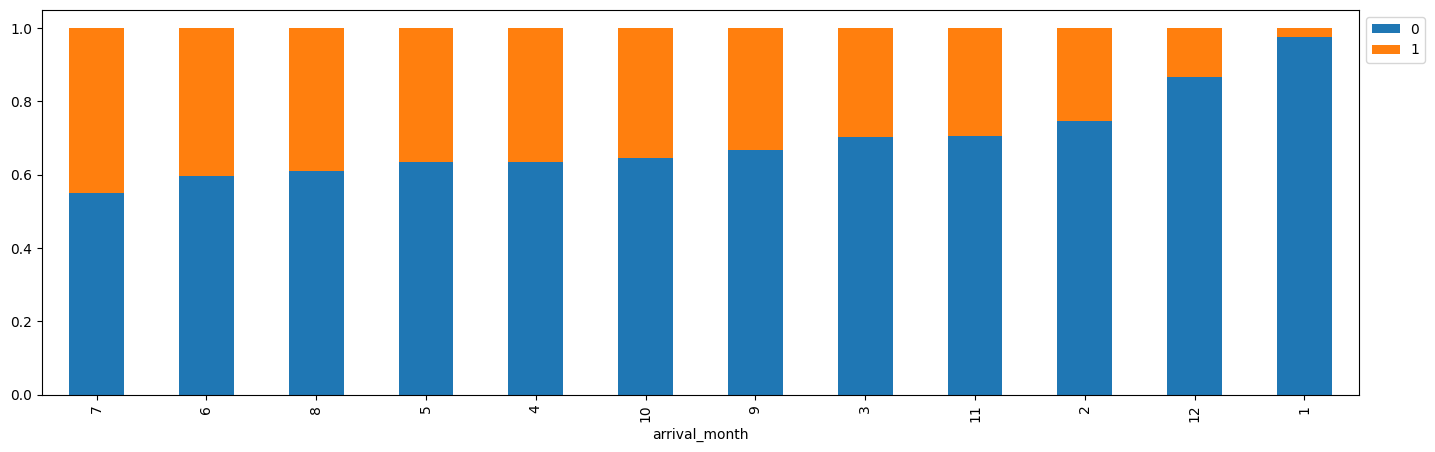

In [64]:
stacked_barplot(df, "arrival_month", "booking_status")

* Chance of booking being cancelled is higher from Jun to August.
* The chance is lowest in January.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

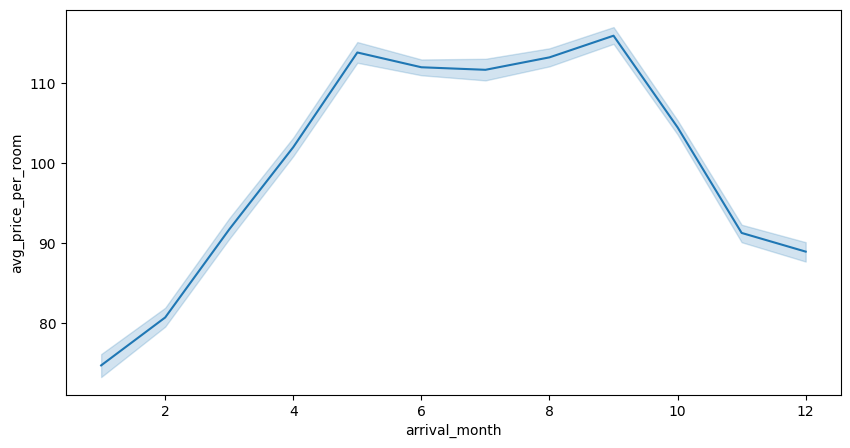

In [65]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="arrival_month", y="avg_price_per_room")
plt.show()


* Average room prices are higher from May to October and lowest on January.

### Outlier Check

- Let's check for outliers in the data.

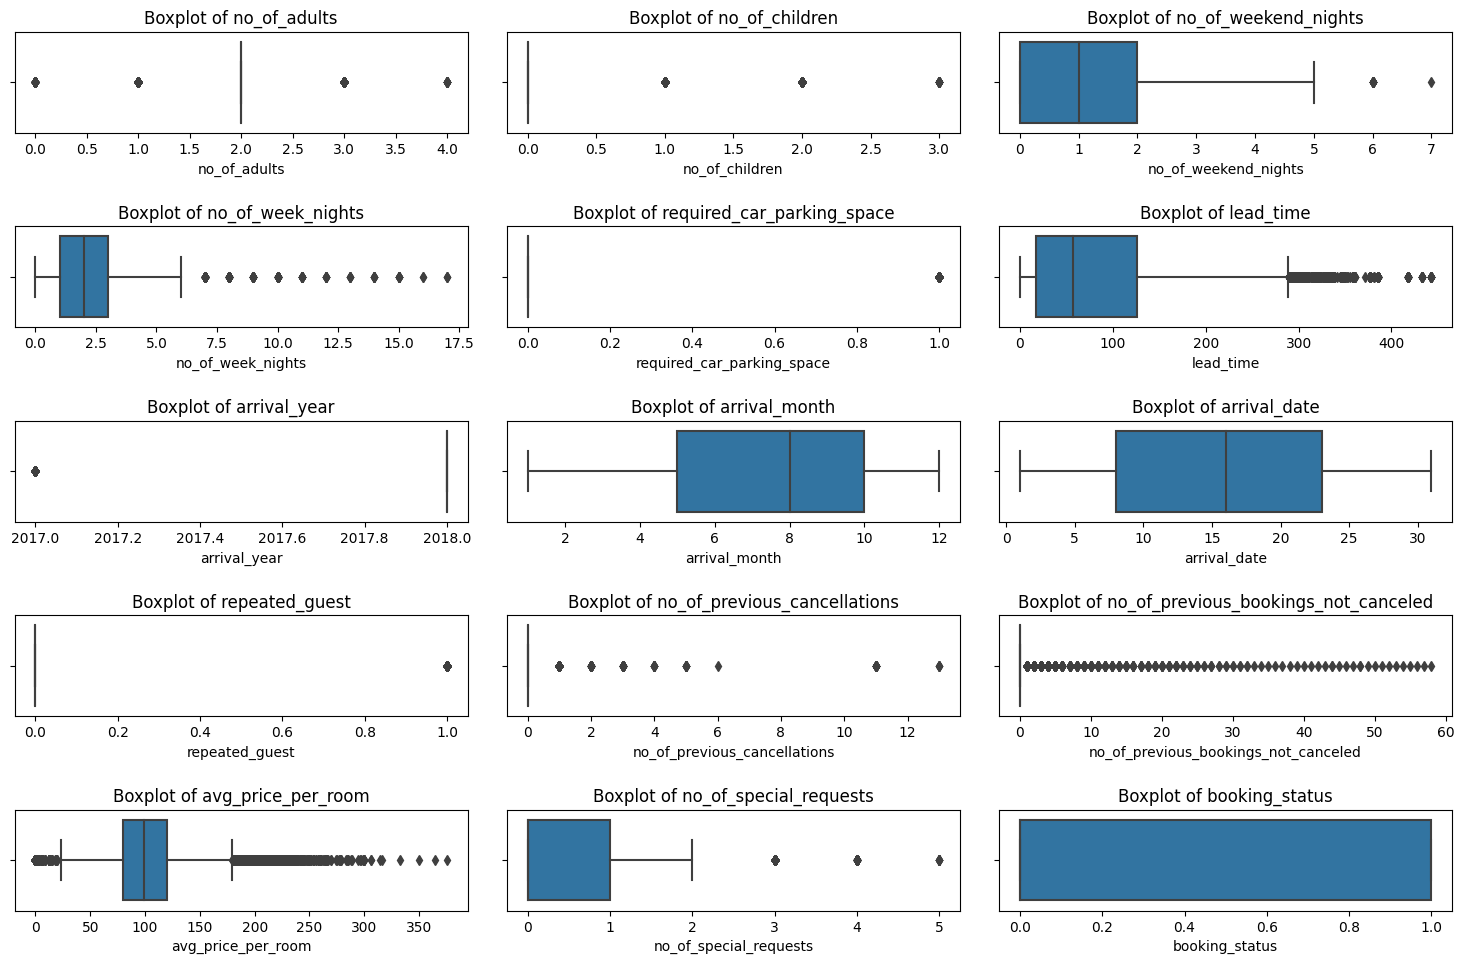

In [66]:
# outlier detection by using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols_count = len(num_cols)

plt.figure(figsize=(15, 10))
rows = int(np.ceil(num_cols_count / 3))  # Adjust the number of columns per row

for i, variable in enumerate(num_cols):
    plt.subplot(rows, 3, i + 1)  # Adjust the number of columns per row
    sns.boxplot(data=df, x=variable)
    plt.title(f"Boxplot of {variable}")
    plt.tight_layout(pad=2)

plt.show()


* Average prices per room, lead time,number of week nights have outliers.
* Actually, all numerical data in data set have outliers.

## Model Building

### Model evaluation criteria

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

### Which case is more important?
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.

##### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [67]:
# define a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [68]:
# define a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression with statsmodels library

### Data Preparation for Modeling

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

### Split Data

In [69]:
# Assuming 'booking_status' is the column representing the target variable and other columns are features in DataFrame df
# Define the independent variables (features) X and the dependent variable (target) y
X = df.drop('booking_status', axis=1)  # Exclude 'booking_status' column from features
y = df['booking_status']  # Select 'booking_status' as the target variable

print(X.head())
print()
print(y.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segm

### Add Constant

In [70]:
import statsmodels.api as sm

# Assuming X contains your predictor variables
# Adding an intercept to X
X = sm.add_constant(X)


### Dummy Variables

In [71]:
# let X contains the independent features with categorical columns

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.00000,2,0,1,2,0,224,2017,10,2,0,0,0,65.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.00000,2,0,2,3,0,5,2018,11,6,0,0,0,106.68000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1.00000,1,0,2,1,0,1,2018,2,28,0,0,0,60.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.00000,2,0,0,2,0,211,2018,5,20,0,0,0,100.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.00000,2,0,1,1,0,48,2018,4,11,0,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [72]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 'test_size=0.3' specifies a 70:30 split (70% train, 30% test)
# 'random_state=42' sets a seed for reproducibility

# Print the shapes of train and test sets (optional)
print("Train set shapes - X_train:", x_train.shape, "y_train:", y_train.shape)
print("Test set shapes - X_test:", x_test.shape, "y_test:", y_test.shape)


Train set shapes - X_train: (25392, 28) y_train: (25392,)
Test set shapes - X_test: (10883, 28) y_test: (10883,)


In [184]:
print(x_train.head())

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
13662             1               0                     0                  1   
26641             2               0                     0                  3   
17835             2               0                     2                  3   
21485             2               0                     0                  3   
5670              2               0                     1                  2   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
13662                           0        163          2018             10   
26641                           0        113          2018              3   
17835                           0        359          2018             10   
21485                           0        136          2018              6   
5670                            0         21          2018              8   

       arrival_date  repeated_guest  no_of_previous_canc

In [185]:
print(x_test.head())

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
30392             1               0                     1                  0   
6685              2               0                     1                  2   
8369              2               0                     2                  3   
2055              2               0                     0                  2   
10969             1               0                     2                  4   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
30392                           0         53          2018              9   
6685                            0         63          2018              4   
8369                            0         55          2018              9   
2055                            0         53          2017             12   
10969                           0        245          2018              7   

       arrival_date  repeated_guest  no_of_previous_canc

## Model Building

### Building Logistic Regression Model

In [186]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")



In [187]:
# Create a logistic regression model
logit = sm.Logit(y_train, x_train.astype(float))

# Fit the logistic regression model
lg = logit.fit()

# Print summary of the model
print(lg.summary())


         Current function value: 0.425090
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 17 Dec 2023   Pseudo R-squ.:                  0.3292
Time:                        07:29:57   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                             0.1137      0.038      3.019      0.003       0.040

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [188]:
print("Training performance:")
model_performance_classification_statsmodels(lg, x_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


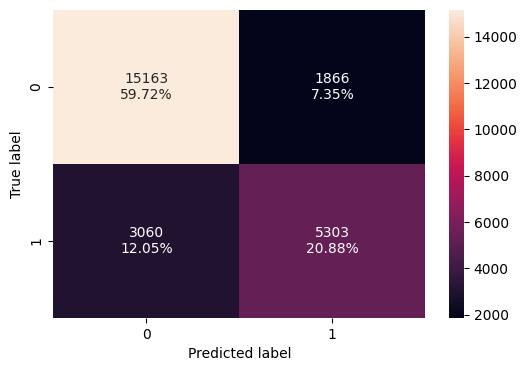

In [189]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, x_train, y_train)

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [190]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define the function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif


In [191]:
checking_vif(x_train)

,feature,VIF
0,no_of_adults,1.35113
1,no_of_children,2.09358
2,no_of_weekend_nights,1.06948
3,no_of_week_nights,1.09571
4,required_car_parking_space,1.03997
5,lead_time,1.39517
6,arrival_year,1.43190
7,arrival_month,1.27633
8,arrival_date,1.00679
9,repeated_guest,1.78358


In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define the function to check VIF and optionally drop high VIF features
def checking_vif(predictors, threshold=10):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]

    # Filter features with VIF above the threshold
    high_vif_features = vif[vif['VIF'] > threshold]['feature']

    # Drop features with high VIF from predictors DataFrame
    predictors = predictors.drop(high_vif_features, axis=1)

    return predictors, vif

In [193]:
# Assuming x_train contains your predictor variables
x_train, vif_results = checking_vif(x_train)

# Print VIF results after dropping features with high VIF
print(vif_results)


                                 feature     VIF
0                           no_of_adults 1.35113
1                         no_of_children 2.09358
2                   no_of_weekend_nights 1.06948
3                      no_of_week_nights 1.09571
4             required_car_parking_space 1.03997
5                              lead_time 1.39517
6                           arrival_year 1.43190
7                          arrival_month 1.27633
8                           arrival_date 1.00679
9                         repeated_guest 1.78358
10          no_of_previous_cancellations 1.39569
11  no_of_previous_bookings_not_canceled 1.65200
12                    avg_price_per_room 2.06860
13                no_of_special_requests 1.24798
14         type_of_meal_plan_Meal Plan 1     inf
15         type_of_meal_plan_Meal Plan 2     inf
16         type_of_meal_plan_Meal Plan 3     inf
17        type_of_meal_plan_Not Selected     inf
18        room_type_reserved_Room_Type 1     inf
19        room_type_

In [268]:
# Assuming 'vif_results' contains your DataFrame with 'feature' and 'VIF' columns

threshold = 10

# Get the features with VIF exceeding the threshold
high_vif_features = vif_results[vif_results['VIF'] > threshold]['feature']

# Drop features with high VIF from your dataset
new_x_train = x_train.drop(columns=high_vif_features)


#### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [269]:
# initial list of columns

selected_features = cols  # Initialize selected_features with all columns

while len(cols) > 0:
    x_train_aux = new_x_train[cols]
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)
    p_values = model.pvalues

    # Check if all remaining predictors have p-values below 0.05
    if all(p < 0.05 for p in p_values):
        break

    feature_with_p_max = p_values.idxmax()
    cols.remove(feature_with_p_max)

selected_features = cols
print(selected_features)


['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests']


In [202]:
x_train1 = x_train[selected_features]
x_test1 = x_test[selected_features]

In [203]:
import statsmodels.api as sm

# Assuming x_train1 contains the selected features and y_train is the target variable

# Train logistic regression on x_train1 and y_train
logit1 = sm.Logit(y_train, x_train1)
lg1 = logit1.fit()

# Print summary of the model
print(lg1.summary())

# Function to check performance
def model_performance_classification_statsmodels(model, x_test, y_true):
    # Get the predicted probabilities
    y_pred_prob = model.predict(x_test)

    # Convert probabilities to binary predictions
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate accuracy and other metrics
    accuracy = (y_pred == y_true).mean()
    print(f"Accuracy: {accuracy:.4f}")

# Check performance on training set
print("Training performance:")
model_performance_classification_statsmodels(lg1, x_train1, y_train)

Optimization terminated successfully.
         Current function value: 0.466270
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25378
Method:                           MLE   Df Model:                           13
Date:                Sun, 17 Dec 2023   Pseudo R-squ.:                  0.2642
Time:                        07:31:29   Log-Likelihood:                -11840.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                             0.1881      0.

In [204]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, x_train1, y_train)

Training performance:
Accuracy: 0.7763


####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [205]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train1.columns).T

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
Odds,1.20696,1.01782,1.16515,1.06183,0.26533,1.01301,0.99823,0.93484,1.00166,0.10557,1.28494,0.84151,1.01990,0.35082
Change_odd%,20.69597,1.78206,16.51457,6.18270,-73.46684,1.30052,-0.17669,-6.51632,0.16555,-89.44315,28.49390,-15.84935,1.98958,-64.91813


#### Checking model performance on the training set

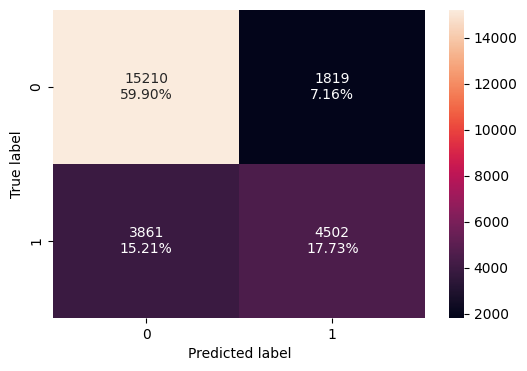

In [206]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, x_train1, y_train)

In [207]:
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, x_train1, y_train)

print("Training performance:")
log_reg_model_train_perf



Accuracy: 0.7763
Training performance:


In [208]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, x_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Accuracy: 0.7865
Test performance:


* The model seems to be performing well on both training and testing set.
* As the train and test performances are comparable, the model is not overfitting.
* Moving forward we will try to improve the performance of the model

#### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### ROC-AUC
* ROC-AUC on training set

In [209]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate False Positive Rate (fpr) and True Positive Rate (tpr) using roc_curve
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(x_train1))

# Find the index of the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]

print("Optimal Threshold (AUC-ROC):", optimal_threshold_auc_roc)

# Use the optimal threshold to create a confusion matrix
def confusion_matrix_statsmodels(model, x_data, y_true, threshold):
    # Get predicted probabilities and convert to binary predictions using the threshold
    y_pred_prob = model.predict(x_data)
    y_pred = (y_pred_prob > threshold).astype(int)

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    return cm

# Create confusion matrix for training set with the optimal threshold
conf_matrix_train = confusion_matrix_statsmodels(lg1, x_train1, y_train, optimal_threshold_auc_roc)
print("Confusion Matrix (Training Set):\n", conf_matrix_train)


Optimal Threshold (AUC-ROC): 0.3339824349026137
Confusion Matrix (Training Set):
 [[12979  4050]
 [ 2178  6185]]


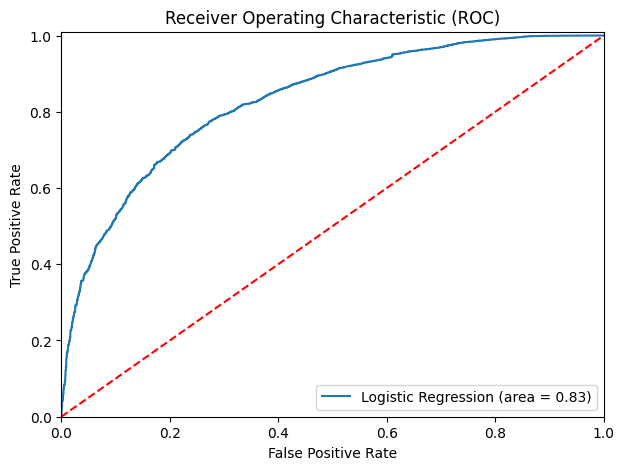

In [210]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC AUC score for the training set
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(x_train1))

# Get false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(x_train1))

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()


* The model is performing well on the training data.

### Optimal threshold using AUC-ROC curve

In [211]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(x_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3339824349026137


In [212]:
confusion_matrix_statsmodels(
    lg1, x_train1, y_train,optimal_threshold_auc_roc)

array([[12979,  4050],
       [ 2178,  6185]])

In [213]:
# Updated function to check performance with a specified threshold
def model_performance_classification_statsmodels(model, x_data, y_true, threshold=0.5):
    # Get predicted probabilities and convert to binary predictions using the threshold
    y_pred_prob = model.predict(x_data)
    y_pred = (y_pred_prob > threshold).astype(int)

    # Calculate accuracy and other metrics
    accuracy = (y_pred == y_true).mean()
    print(f"Accuracy: {accuracy:.4f}")

    # You can calculate other performance metrics here

    return accuracy  # Return accuracy or other metrics as needed


In [214]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, x_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Accuracy: 0.7547
Training performance:


0.754725897920605

In [215]:
# First drop the columns from the test set that were dropped from the training set.
x_test1 = x_test[list(x_train1.columns)]

In [216]:
# Check performance on testing set with the specified threshold
print("Testing performance:")
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, x_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Accuracy on Testing Set with Optimal Threshold (AUC-ROC):", log_reg_model_test_perf_threshold_auc_roc)


Testing performance:
Accuracy: 0.7622
Accuracy on Testing Set with Optimal Threshold (AUC-ROC): 0.7621979233667188


 - The model shows slightly better performance on the testing set compared to the training set, with an accuracy of around 71.18%.
 - Both training and testing accuracies are relatively close, indicating that the model doesn't suffer from significant overfitting or underfitting issues. However, minor differences in accuracy between training and testing sets are normal in real-world scenarios.
 - An accuracy of 71.05% means that the model predicts the correct class label for around 71.05% of the instances in the testing dataset, suggesting reasonable predictive performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

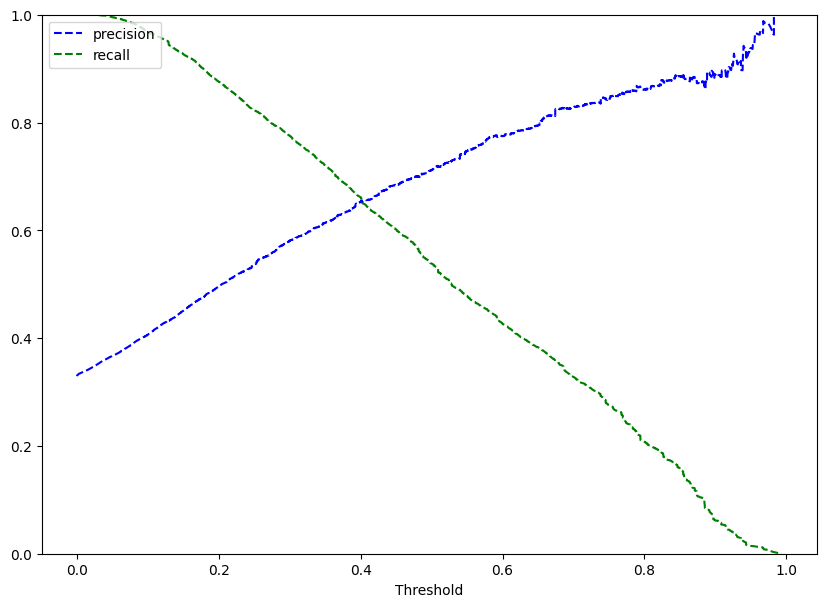

In [217]:
from sklearn.metrics import precision_recall_curve

# Your code that uses precision_recall_curve
y_scores = lg1.predict(x_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

**Using model with threshold = 0.42**

In [218]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

In [219]:


# creating confusion matrix
confusion_matrix_statsmodels(lg1, x_train1, y_train, threshold=optimal_threshold_curve)



array([[14349,  2680],
       [ 3073,  5290]])

In [220]:


log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, x_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve



Accuracy: 0.7734
Training performance:


0.7734325771896661

In [221]:
# Updated function to create a confusion matrix with a specified threshold
def confusion_matrix_statsmodels(model, x_data, y_true, threshold=0.42):
    # Get predicted probabilities and convert to binary predictions using the threshold
    y_pred_prob = model.predict(x_data)
    y_pred = (y_pred_prob > threshold).astype(int)

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    return cm

# Create confusion matrix for training set with the specified threshold
conf_matrix_train = confusion_matrix_statsmodels(lg1, x_train1, y_train, threshold=optimal_threshold_curve)
print("Confusion Matrix (Training Set):\n", conf_matrix_train)


Confusion Matrix (Training Set):
 [[14349  2680]
 [ 3073  5290]]


In [222]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, x_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Accuracy: 0.7734
Training performance:


0.7734325771896661

* Model is performing well on training set.

#### Let's check the performance on the test set

In [223]:
# Create confusion matrix for testing set
conf_matrix_test = confusion_matrix_statsmodels(lg1, x_test1, y_test, threshold=optimal_threshold_curve)
print("Confusion Matrix (Testing Set):\n", conf_matrix_test)


Confusion Matrix (Testing Set):
 [[6267 1094]
 [1266 2256]]


In [224]:
# Check performance on testing set
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, x_test1, y_test, threshold=optimal_threshold_curve)
print("Test performance:")
print(log_reg_model_test_perf)


Accuracy: 0.7831
Test performance:
0.7831480290361114


**Using model with threshold=0.37**

In [225]:
# setting the threshold
optimal_threshold_curve = 0.37

#### Checking model performance on training set

In [226]:
# Updated function to create a confusion matrix with a specified threshold
def confusion_matrix_statsmodels(model, x_data, y_true, threshold=0.37):
    # Get predicted probabilities and convert to binary predictions using the threshold
    y_pred_prob = model.predict(x_data)
    y_pred = (y_pred_prob > threshold).astype(int)

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    return cm

# Create confusion matrix for training set with the specified threshold
conf_matrix_train = confusion_matrix_statsmodels(lg1, x_train1, y_train, threshold=optimal_threshold_curve)
print("Confusion Matrix (Training Set):\n", conf_matrix_train)


Confusion Matrix (Training Set):
 [[13602  3427]
 [ 2556  5807]]


In [227]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, x_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Accuracy: 0.7644
Training performance:


0.7643746061751733

#### Let's check the performance on the test set

In [228]:
# Create confusion matrix for testing set
conf_matrix_test = confusion_matrix_statsmodels(lg1, x_test1, y_test, threshold=optimal_threshold_curve)
print("Confusion Matrix (Testing Set):\n", conf_matrix_test)

Confusion Matrix (Testing Set):
 [[5966 1395]
 [1051 2471]]


In [229]:
# checking model performance for this model
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, x_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Accuracy: 0.7752
Test performance:


0.7752457961959018

### Decision Tree

#### Data Preparation for modeling (Decision Tree)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [232]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# Create dummy variables for categorical columns in X
X = pd.get_dummies(X)

# Split the data into train and test sets in a 70:30 ratio with random_state=1
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


In [233]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 30)
Shape of test set :  (10883, 30)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [234]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [235]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Building Decision Tree Model

In [236]:
model = DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

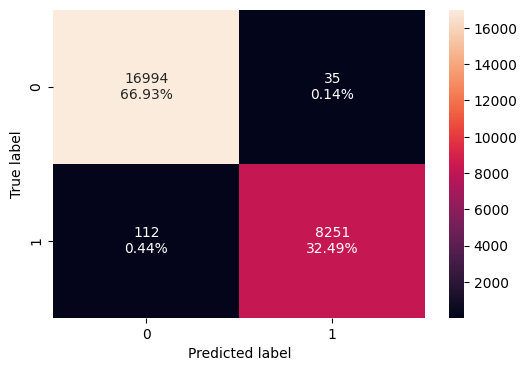

In [237]:
confusion_matrix_sklearn(model, x_train, y_train)

In [238]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, x_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117




   - Model is able to perfectly classify all the data points on the training set.
   - Almost errors on the training set, each sample has been classified correctly.
  



#### Checking model performance on test set

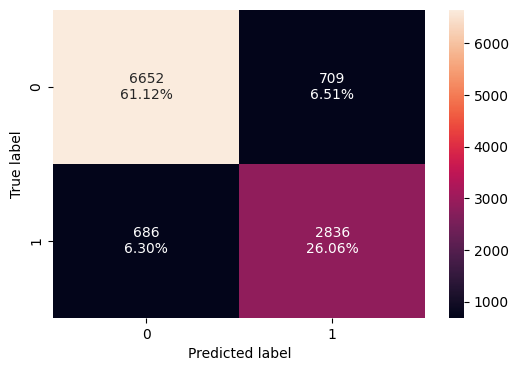

In [239]:
confusion_matrix_sklearn(model,x_test,y_test)

In [240]:
decision_tree_perf_test = model_performance_classification_sklearn(model,x_test,y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87182,0.80522,0.80000,0.80260


- There is a disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

**Before pruning the tree let's check the important features.**

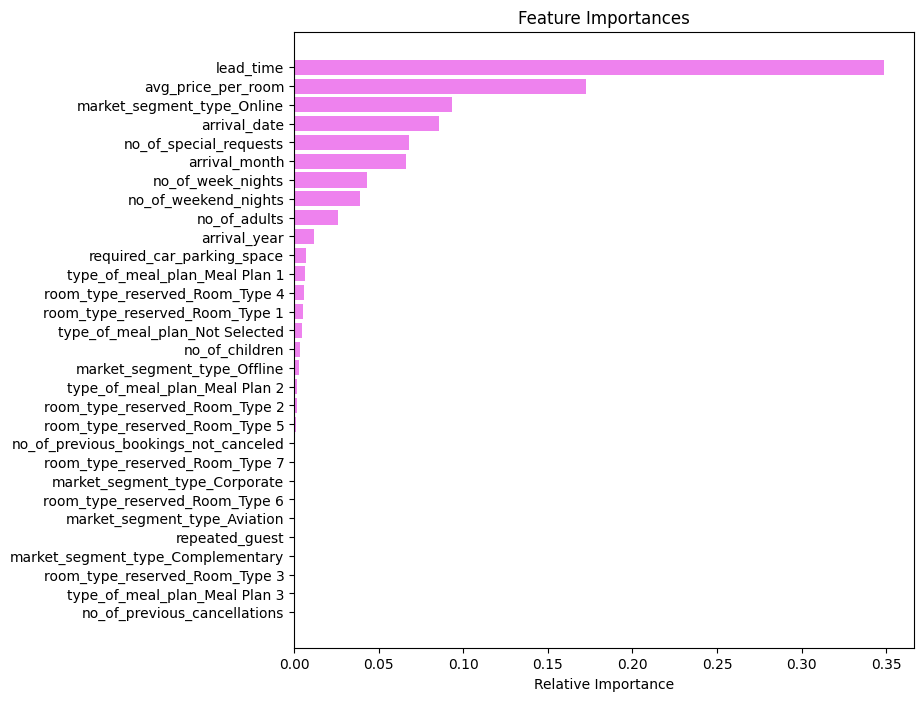

In [241]:
feature_names = list(x_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

 - Lead time, average price per room and market segment type online are most important features in decision tree before pruning.

#### Pruning the tree

**Pre-Pruning**

In [242]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=75,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

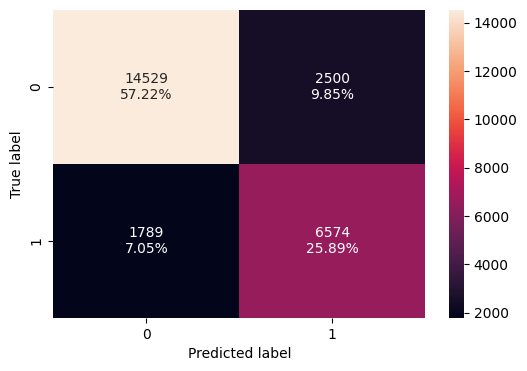

In [243]:
confusion_matrix_sklearn(estimator, x_train, y_train)

In [244]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, x_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83109,0.78608,0.72449,0.75403


#### Checking performance on test set

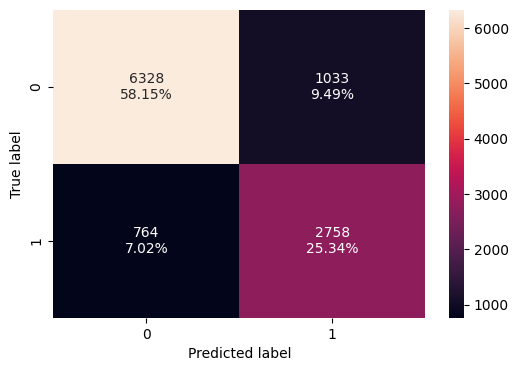

In [245]:
confusion_matrix_sklearn(estimator, x_test,y_test)

In [246]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, x_test,y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83488,0.78308,0.72751,0.75427


 - The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.78 which shows that the model is able to generalize well on unseen data.

#### Visualizing the Decision Tree

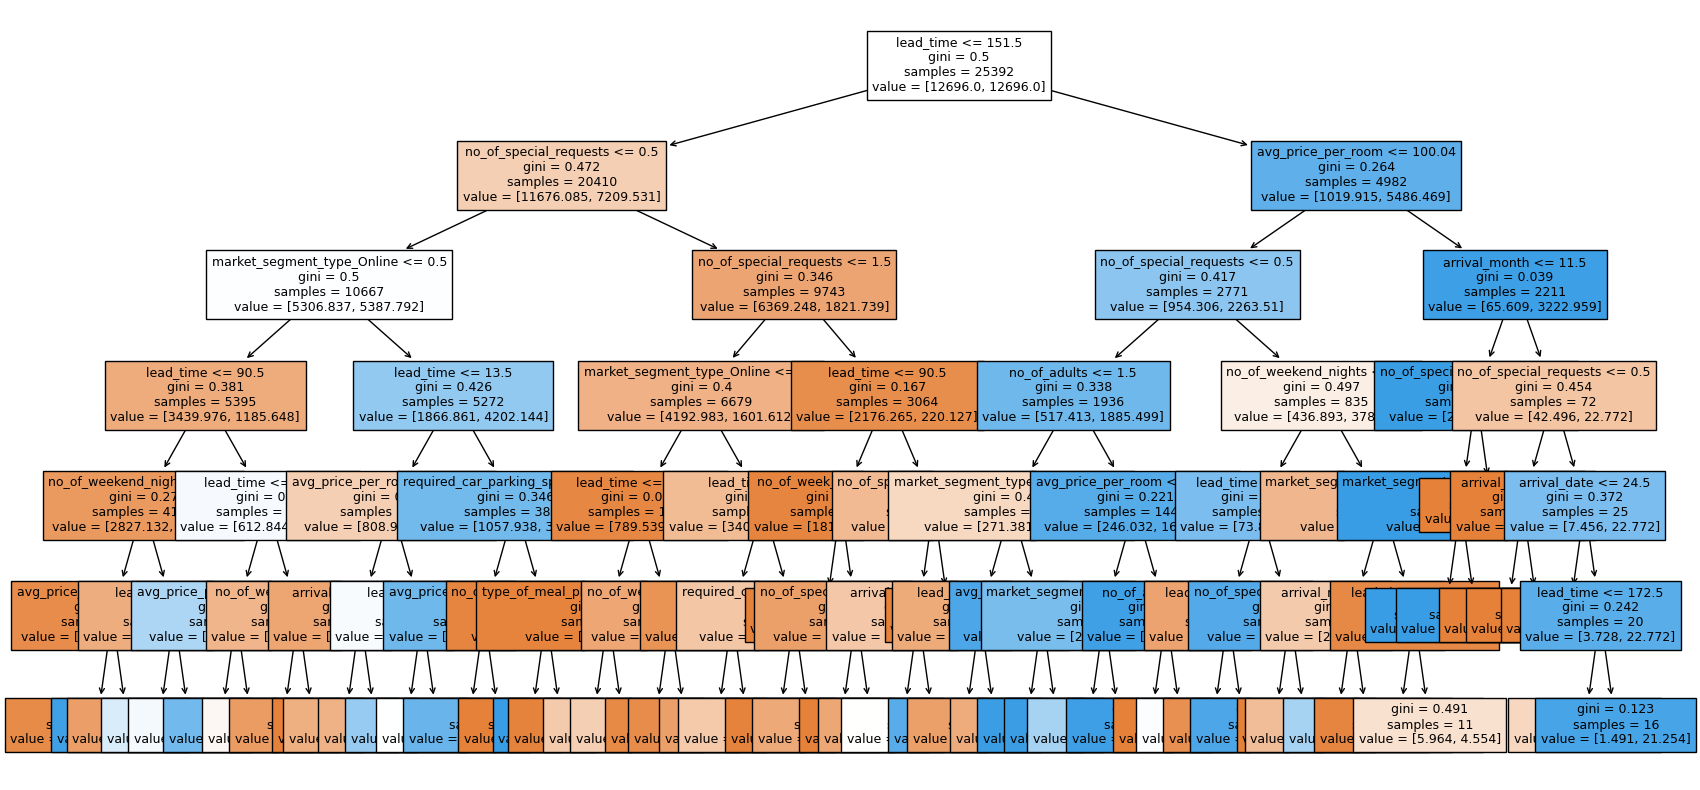

In [247]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [248]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

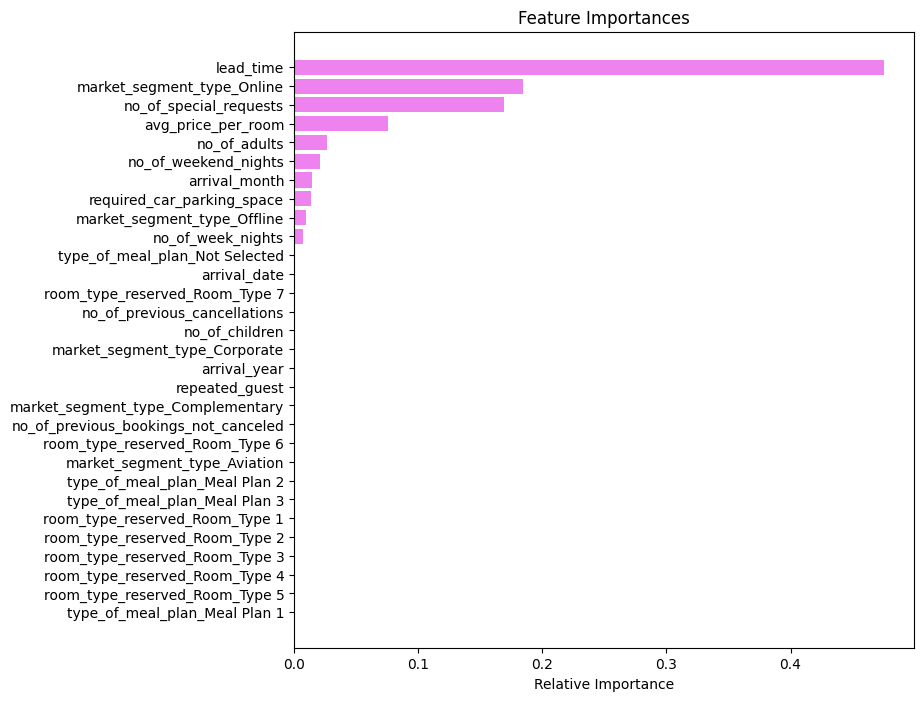

In [249]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- In the pre tuned decision tree also, lead time and market segment type online are the most important features.

**Cost Complexity Pruning**

In [250]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [251]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


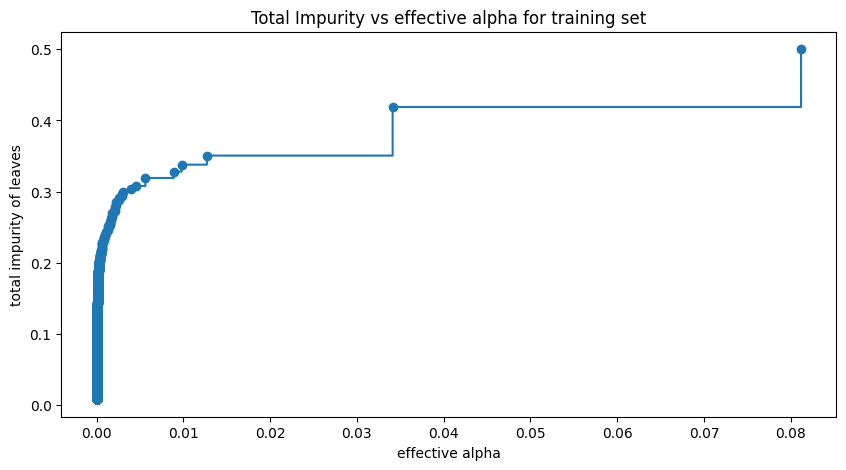

In [252]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas, impurities[:len(ccp_alphas)], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()


Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [253]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137149


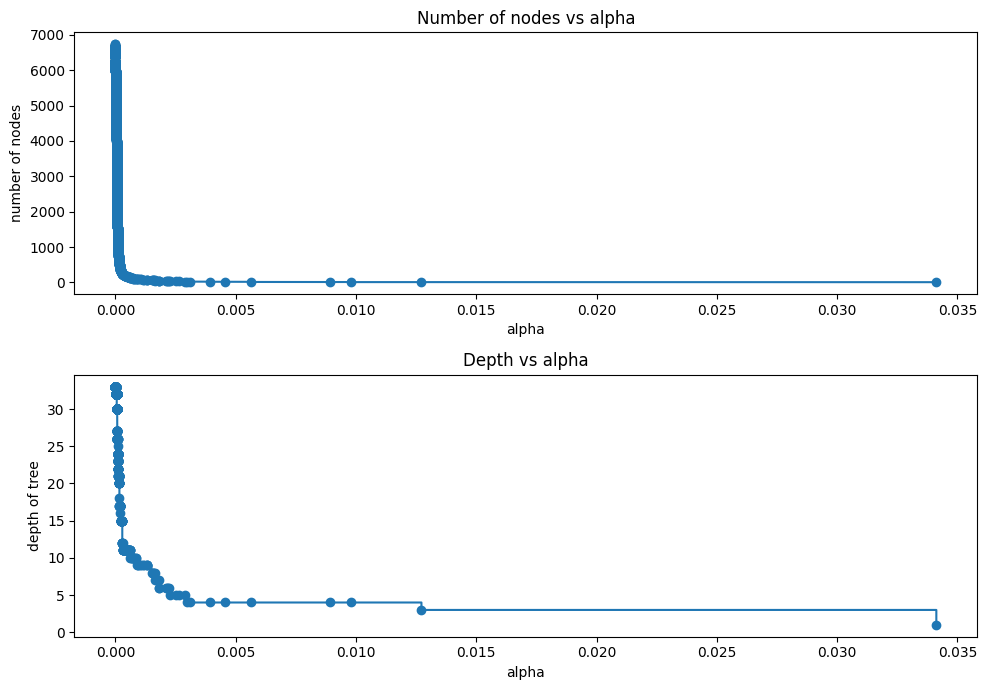

In [254]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [255]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [256]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

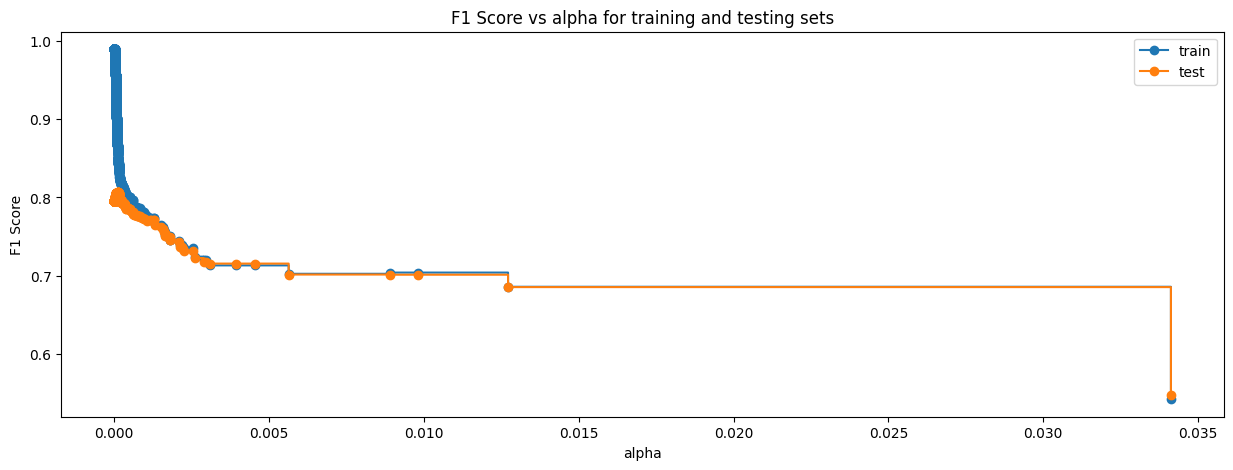

In [257]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [258]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001348499238051838, class_weight='balanced',
                       random_state=1)


#### Checking performance on training set

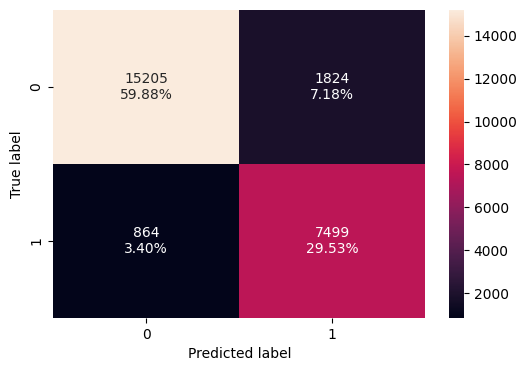

In [259]:
confusion_matrix_sklearn(best_model, x_train, y_train)

In [260]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, x_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89414,0.89669,0.80435,0.84802


#### Checking performance on test set

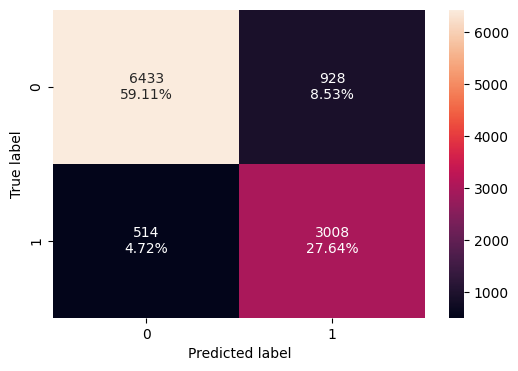

In [261]:
confusion_matrix_sklearn(best_model, x_test, y_test)

In [262]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, x_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86750,0.85406,0.76423,0.80665


- In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 0.86 which shows that the model is able to generalize well on unseen data.

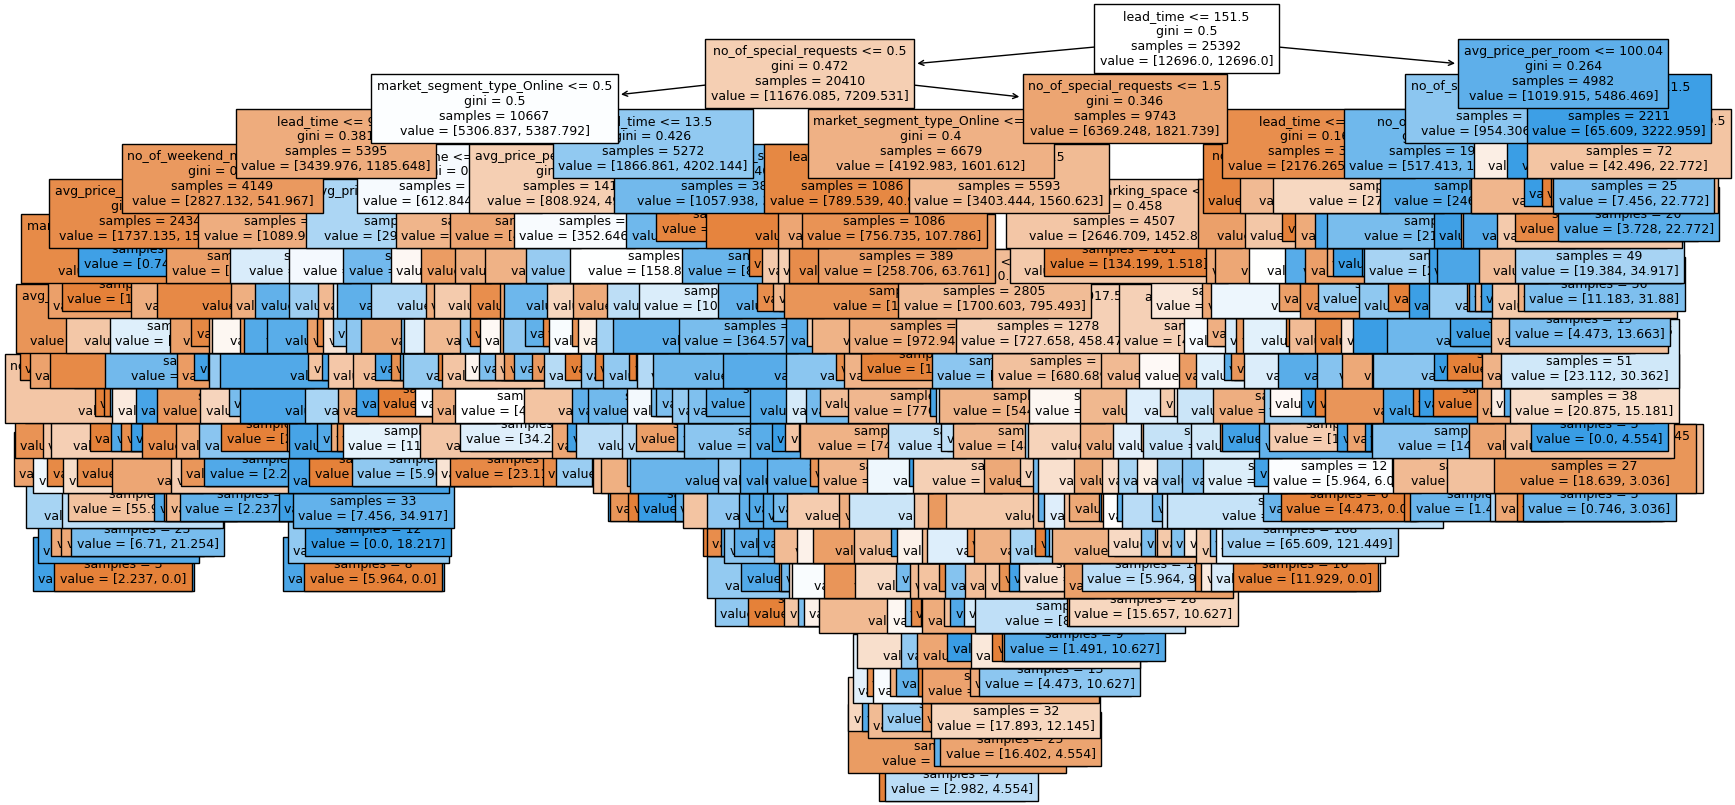

In [263]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [264]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

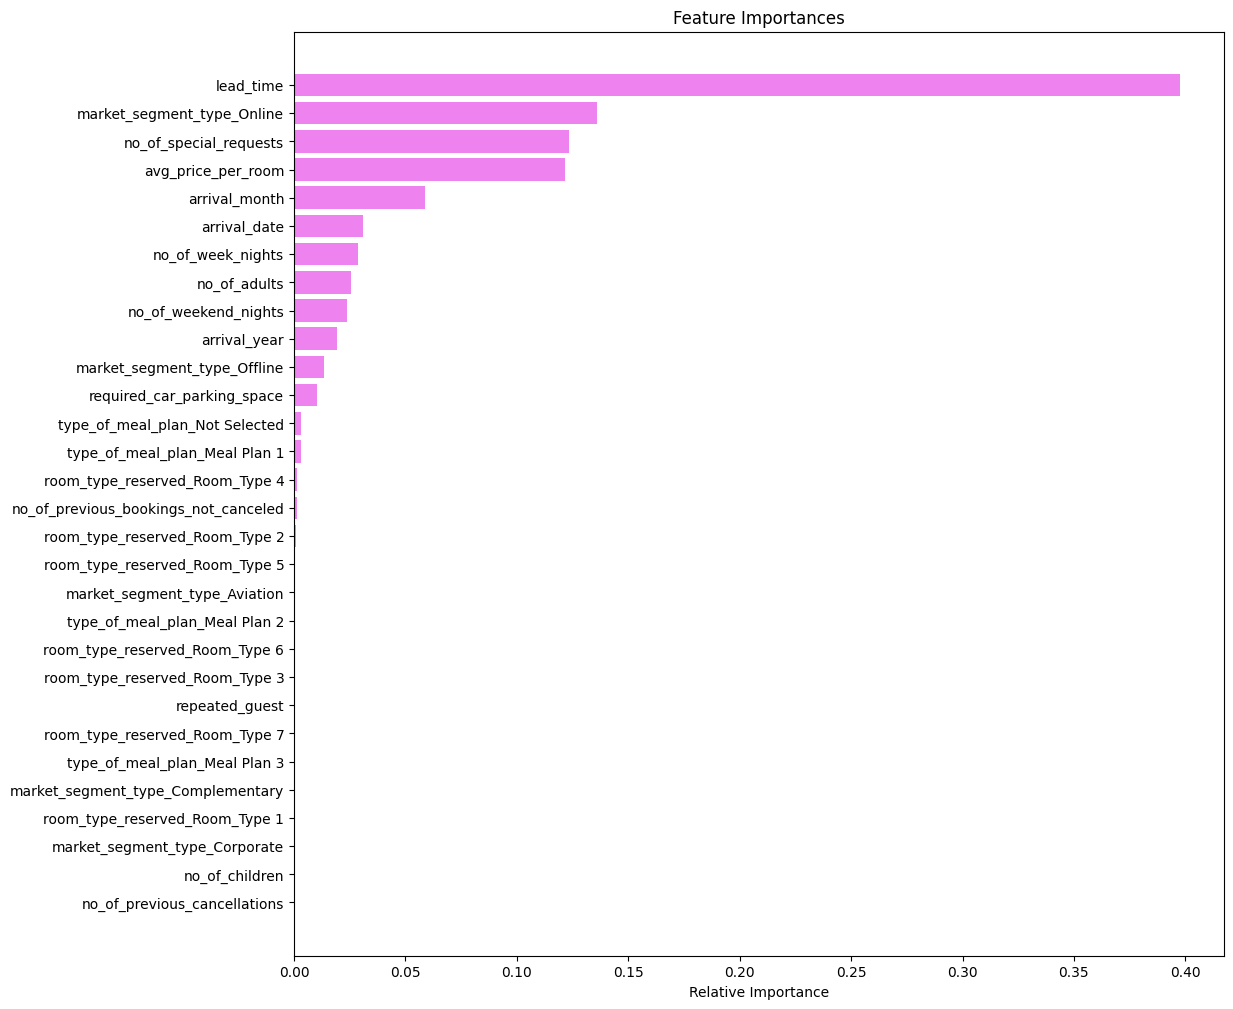

In [265]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Lead time and market segment type-online are the most important features for the post pruned tree

## Model Performance Comparison and Conclusions

In [266]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83109,0.89414
Recall,0.98661,0.78608,0.89669
Precision,0.99578,0.72449,0.80435
F1,0.99117,0.75403,0.84802


In [267]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87182,0.83488,0.86750
Recall,0.80522,0.78308,0.85406
Precision,0.80000,0.72751,0.76423
F1,0.80260,0.75427,0.80665




  - Decision tree models with pre-pruning and post-pruning both are giving equally high recall scores on both training and test sets.
  - However, we will choose the post pruned tree as the best model since it is giving a slightly high precision score on the train and test sets than the pre-pruned tree.



## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?



   -  The model built can be used to predict if booking is going to be cancelled or not and can correctly identify 85.4% of the booking cancelations.

   -  Lead time and market segment type-online are the most important variables in predicting whether a booking will be cancelled or not.
   
   Based on the insights derived from the decision tree model:

    
  -  Cancellation Policies and Refunds:
        Implement flexible cancellation policies, especially for bookings with longer lead times. Shortening the lead time might reduce cancellation rates.
        Tailor cancellation/refund policies based on the market segment type, particularly focusing on online bookings. This segment appears to have a significant impact on cancellations, suggesting a need for specialized policies or incentives to mitigate cancellations within this segment.

  -  Vigilance on Lead Time and Market Segment Type:
        Monitor lead time trends closely. Bookings made well in advance seem more prone to cancellations, indicating a need for targeted strategies or promotions to solidify these early bookings.
        Pay special attention to bookings originating from the online market segment. This segment might have specific preferences or behaviors leading to higher cancellation rates, warranting customized approaches or marketing campaigns.

  - Data Analysis and Refinement:
      Expand the dataset to include more variables or a larger sample size for better model accuracy and robustness. Incorporating additional data may reveal more nuanced insights, allowing for more accurate predictions of cancellations.
      Consider exploring other potential influential factors that might contribute to cancellations. Features like customer demographics, booking channel, or seasonal patterns could offer valuable insights into cancellation behavior.

  - Risk Mitigation Strategies:
      Develop proactive strategies to minimize cancellations by engaging with customers who show characteristics prone to cancellation. This proactive approach could involve personalized communication, offers, or incentives to encourage commitment to bookings.

  - Continuous Monitoring and Adaptation:
      Continuously monitor the model's performance and adjust strategies accordingly. Analyze new data regularly to refine predictive models and adapt policies or marketing strategies based on changing trends or customer behaviors.

  - Customer Engagement and Retention:
      Focus on customer satisfaction and engagement to foster loyalty. Enhance customer experience, possibly through loyalty programs or personalized services, to encourage customers to retain their bookings.

-  By implementing these recommendations and closely analyzing the lead time and market segment type, the hotel can potentially reduce cancellation rates, optimize revenue, and enhance customer satisfaction and retention.
